# Testing C8 model for different numbers of considered attributes

C2, C3, etc.

In [1]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from itertools import chain
import statsmodels.api as sm
import pylab as py

import matplotlib.pyplot as plt

from datetime import datetime

import itertools

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [2]:
file = open('NetSense_network.pkl', 'rb')
# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Showing the pickled data:
The data  0  is :  1
The data  1  is :  2
The data  2  is :  3
The data  3  is :  4
The data  4  is :  5
The data  5  is :  6


In [3]:
#creating list of attributes
list_of_attributes = set([k for n in data[1].nodes for k in data[1].nodes[n].keys()])

#creating possible attribute values
attribute_values = dict((attribute, set() ) for attribute in list_of_attributes)

for sem in range(1,7):
    for node in data[sem].nodes():
        for attribute in list_of_attributes:
            attribute_values[attribute].add(data[sem].nodes[node][attribute])

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

{'age_1': {1, 2},
 'marijuana_': {1, 2, 3},
 'homosexual_': {1, 2, 3},
 'premaritalsex_': {1, 2, 3},
 'deathpen_': {1, 2, 3},
 'gaymarriage_': {1, 2, 3},
 'abortion_': {1, 2, 3},
 'ethnicity_1': {1, 2, 3, 4},
 'euthanasia_': {1, 2, 3},
 'political_': {1, 2, 3},
 'gender_1': {1, 2},
 'hometown_1': {1, 2, 3}}

In [4]:
#creating table of attribute values
attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    attributes[i] = np.zeros([len(data[i].nodes), len(list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(list_of_attributes):
            attributes[sem][i,j] = data[sem].nodes[node][attribute]

In [5]:
attributes

{1: array([[1., 2., 3., ..., 1., 2., 1.],
        [1., 3., 2., ..., 1., 2., 1.],
        [1., 3., 1., ..., 3., 1., 1.],
        ...,
        [2., 1., 1., ..., 2., 1., 1.],
        [2., 1., 1., ..., 1., 2., 3.],
        [2., 3., 3., ..., 2., 1., 1.]]),
 2: array([[2., 1., 1., ..., 1., 1., 3.],
        [2., 1., 1., ..., 1., 2., 1.],
        [1., 1., 3., ..., 1., 2., 1.],
        ...,
        [1., 1., 3., ..., 1., 2., 1.],
        [1., 1., 3., ..., 1., 1., 2.],
        [1., 1., 3., ..., 3., 2., 1.]]),
 3: array([[1., 1., 3., 3., 1., 3., 3., 1., 3., 2., 2., 2.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.],
        [2., 3., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2.],
        [1., 3., 3., 3., 3., 3., 1., 3., 3., 3., 2., 1.],
        [2., 2., 3., 3., 1., 3., 3., 1., 3., 1., 1., 1.],
        [1., 1., 1., 1., 1., 3., 3., 2., 3., 2., 2., 1.],
        [1., 2., 3., 3., 1., 3., 1., 1., 2., 1., 1., 2.],
        [2., 1., 3., 3., 1., 3., 3., 1., 2., 3., 2., 2.],
        [1., 1., 3., 1., 1., 

In [6]:
df = pd.DataFrame(data=attributes[1], columns=attribute_values)
print(df)

    age_1  marijuana_  homosexual_  premaritalsex_  deathpen_  gaymarriage_  \
0     1.0         2.0          3.0             3.0        3.0           3.0   
1     1.0         3.0          2.0             2.0        2.0           1.0   
2     1.0         3.0          1.0             3.0        3.0           3.0   
3     2.0         2.0          3.0             3.0        1.0           3.0   
4     2.0         1.0          3.0             3.0        2.0           2.0   
..    ...         ...          ...             ...        ...           ...   
93    1.0         1.0          1.0             3.0        3.0           1.0   
94    1.0         3.0          3.0             3.0        3.0           1.0   
95    2.0         1.0          1.0             3.0        2.0           1.0   
96    2.0         1.0          1.0             1.0        1.0           2.0   
97    2.0         3.0          3.0             3.0        1.0           3.0   

    abortion_  ethnicity_1  euthanasia_  political_

In [7]:

# ord_list_of_attributes = list_of_attributes - {'ethnicity_1', 'gender_1', 'hometown_1', 'age_1'}
# print(ord_list_of_attributes)
ord_list_of_attributes = ['euthanasia_', 'marijuana_', 'premaritalsex_', 'abortion_', 'gaymarriage_', 'political_', 'deathpen_', 'homosexual_']

#creating table of attribute values
ord_attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    ord_attributes[i] = np.zeros([len(data[i].nodes), len(ord_list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(ord_list_of_attributes):
            ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
print(ord_attributes)

{1: array([[3., 2., 3., 3., 3., 1., 3., 3.],
       [2., 3., 2., 2., 1., 1., 2., 2.],
       [3., 3., 3., 3., 3., 3., 3., 1.],
       [1., 2., 3., 3., 3., 3., 1., 3.],
       [1., 1., 3., 3., 2., 2., 2., 3.],
       [3., 1., 1., 1., 1., 2., 1., 1.],
       [1., 1., 1., 1., 2., 1., 2., 2.],
       [2., 3., 1., 2., 2., 2., 2., 1.],
       [3., 2., 3., 3., 3., 2., 1., 3.],
       [1., 3., 3., 1., 3., 3., 1., 3.],
       [3., 2., 1., 1., 1., 2., 1., 1.],
       [1., 1., 1., 1., 2., 1., 1., 1.],
       [2., 3., 3., 1., 3., 1., 1., 3.],
       [1., 3., 1., 1., 1., 1., 1., 2.],
       [3., 3., 3., 1., 3., 3., 3., 3.],
       [3., 2., 2., 1., 1., 1., 1., 2.],
       [2., 2., 3., 1., 1., 1., 2., 1.],
       [3., 3., 1., 1., 1., 1., 3., 1.],
       [3., 3., 2., 3., 3., 3., 2., 3.],
       [3., 3., 3., 1., 3., 1., 1., 1.],
       [3., 3., 3., 3., 3., 1., 3., 3.],
       [3., 3., 3., 3., 3., 3., 1., 3.],
       [3., 3., 3., 1., 3., 1., 1., 3.],
       [3., 3., 3., 3., 3., 3., 1., 3.],
       [2., 

## Max difference of new attributes

In [8]:
def calc_distance(agent1, agent2, scale = 1):
    return np.sum(np.abs(agent1-agent2)) / len(agent1) / scale

def calc_distances(agents, scale = 1):
    N, A = agents.shape
    
    distances = np.zeros([N,N])
    
    for i in range(0,N):
        for j in range(i+1,N):
            distances[i,j] = calc_distance(agents[i], agents[j], scale)
            distances[j,i] = distances[i,j]
    return distances


In [9]:
ord_attributes[1][[53,79,94]], ord_list_of_attributes

(array([[1., 1., 1., 1., 3., 1., 1., 1.],
        [1., 1., 1., 1., 3., 1., 1., 1.],
        [3., 3., 3., 3., 1., 3., 3., 3.]]),
 ['euthanasia_',
  'marijuana_',
  'premaritalsex_',
  'abortion_',
  'gaymarriage_',
  'political_',
  'deathpen_',
  'homosexual_'])

In [10]:
def calc_link_polarity2(agent1, agent2, th, attr_dif):
    return calc_distance(agent1, agent2, attr_dif) <= th

def calc_link_polarities2(agents, th, attr_dif):
    N, A = agents.shape
    
    polarities = (calc_distances(agents, attr_dif) <= th)*2 - 1 - np.eye(N)
    
    return polarities

def balanced_triad_density(polarities):
    N = polarities.shape[0]
    return (np.sum(np.matmul(polarities,polarities) * polarities) / 6 / (N*(N-1)*(N-2)/6) + 1)/2

In [11]:
# polarities = calc_link_polarities2(dcor_attributes[1], 0.5)
pol2 = calc_link_polarities2(ord_attributes[1], 0.5, 2)
# balanced_triad_density(polarities), 
balanced_triad_density(pol2)

0.7293682937092363

In [12]:
def balanced_triad_density_network(polarities, triads):
    T = len(triads)
    dens = 0.
    for triad in triads:
        i, j, k = triad
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            dens = dens + 1
    dens = dens / T
    return dens

def get_triads_polarity(polarities, triads):
    Ts = len(triads)
    
    t_pol = np.zeros(Ts) 
    t_pol_type = np.zeros(Ts)
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        pols = [polarities[i,j], polarities[i,k], polarities[k,j]]
        
        t_pol_type[t] = 3-(sum(pols)+3)/2
        
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            t_pol[t] = 1
        else:
            t_pol[t] = -1
    
    return t_pol, t_pol_type

def count_triads_types(polarities, triads):
    t_pol, t_pol_type = get_triads_polarity(polarities, triads)
    
    t2 = np.array(t_pol_type)
    triads_type = [sum(t2 == i) for i in range(0,4)]
    
    return triads_type


In [13]:
def get_triads(net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]

    triads = []

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                for k in range(j+1,N):
                    if A[i,k] > 0 and A[j,k] > 0:
                        triads.append((i,j,k))
    
    return triads

def get_triads_strength(triads, net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]
    Ts = len(triads)
    
    s_mul = np.zeros(Ts) #multiplicative strength
    s_add = np.zeros(Ts) #additive strength
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        s_mul[t] = A[i,j] * A[i,k] * A[j,k]
        s_add[t] = A[i,j] + A[i,k] + A[j,k]
    
    return s_mul, s_add

In [14]:
sem = 1
triads = get_triads(data[sem])

polarities = calc_link_polarities2(ord_attributes[sem], 0.1, 2)

balanced_triad_density_network(polarities, triads), balanced_triad_density(polarities)

(0.06666666666666667, 0.06435409215232485)

In [15]:
sem = 4
triads = get_triads(data[sem])

thetas = np.linspace(0,1,101)

bals = np.zeros(len(thetas))
all_bals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    polarities = calc_link_polarities2(ord_attributes[sem], theta, 2)
    bals[i] = balanced_triad_density_network(polarities, triads)
    all_bals[i] = balanced_triad_density(polarities)


Text(0, 0.5, 'density of balanced triads')

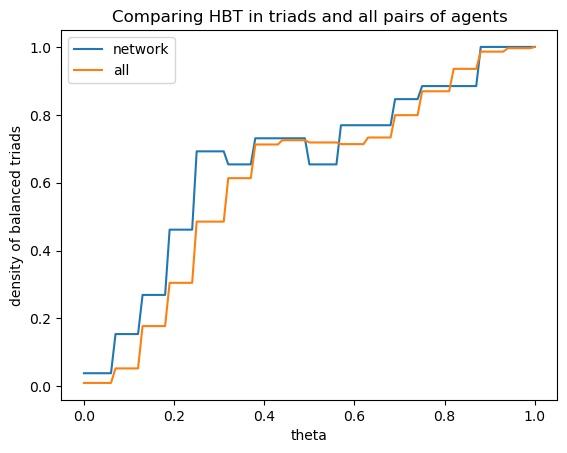

In [16]:
plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Comparing HBT in triads and all pairs of agents")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

# C8

In [17]:
def randomize_all_attributes(attr, randomized_agents = []):
    N, A = attr.shape
    
    if len(randomized_agents) == 0:
        randomized_agents = list(range(0,N))
    
    attr_rand = np.copy(attr)
    
    attr_copy = attr_rand[randomized_agents]
    
    np.random.shuffle(attr_copy)
    
    attr_rand[randomized_agents] = attr_copy
    
    return attr_rand

def randomize_attribute_sets(ord_attributes, randomized_agents_sets = []):
    rand_ord_attributes = dict((i, 0) for i in range(1,7))
    
    for sem in range(1,7):
        if len(randomized_agents_sets) == 0:
            randomized_agents = []
        else:
            randomized_agents = randomized_agents_sets[sem-1]
        rand_ord_attributes[sem] = randomize_all_attributes(ord_attributes[sem], randomized_agents)
    
    return rand_ord_attributes

""" Not working, because there are different student sets in each term. 
"""
def randomize_correlated(ord_attributes):
    rand_ord_attributes = dict((i, 0) for i in range(1,7))
    
    

def compare_bal_triads(triads, agents, th, attr_dif, M, randomized_agents = []):
    """
    triads - list of sets of node ids forming a triad
    agents - array of vectors of agent attributes
    th - threshold used
    attr_dif - max difference between attributes
    M - number of times to repeat randomization
    """
    polarities = calc_link_polarities2(agents, th, attr_dif)
    bal_dens = balanced_triad_density_network(polarities, triads)
    
    bal_dens_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents, randomized_agents)
        polarities_rand = calc_link_polarities2(agents_rand, th, attr_dif)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
        
    pval = np.sum(bal_dens_rands > bal_dens)
    
    return bal_dens_rands, bal_dens, pval

def compare_networks(data, th, attr_dif, M):
    pvals = np.zeros(6)
    vals = np.zeros(6)
    stds = np.zeros(6)
    difs = np.zeros(6)
    
    for n in range(1,7):
#         print(n)
        net = data[n]
        triads = get_triads(net)
        agents = ord_attributes[n]
        
        bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, agents, th, attr_dif, M)
        pvals[n-1] = pval
        vals[n - 1] = bal_dens
        difs[n-1] = np.mean(bal_dens - bal_dens_rands)
        stds[n-1] = np.std(difs)
    return pvals, vals, difs, stds

def compare_weighted_network(net, agents, th, attr_dif, M):
    polarities = calc_link_polarities2(agents, th, attr_dif)
    U_data, pval_data = compare_weighted_links(net, polarities)
    
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents)
        polarities_rand = calc_link_polarities2(agents_rand, th, attr_dif)
        U_rands[i], pval_rands[i] = compare_weighted_links(net, polarities_rand)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

def compare_weighted_networks(data, ord_attributes, th, attr_dif, M):
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    U_data, pval_data = compare_all_weighted_links(data, ord_attributes, th, attr_dif)
    
    for i in range(0,M):
        rand_ord_attributes = randomize_attribute_sets(ord_attributes)
        U_rands[i], pval_rands[i] = compare_all_weighted_links(data, rand_ord_attributes, th, attr_dif)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

# Analysis with taking all terms together and considering varying number of attributes

### Geting true densities for different groups of attributes considered

In [90]:
first_sem = 1
last_sem = 6

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Started analysis")

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

possible_attrs = list(range(0,8))

df = pd.DataFrame()
df_sum = pd.DataFrame

for G in range(1,9):
    thetas = [i/2/G for i in range(0,2*G)]
#     thetas[-1] = 1.
#     bal_dens = np.zeros(len(thetas))
    
    combs = [comb for comb in itertools.combinations(possible_attrs, G)]
    all_combinations = list(itertools.product(combs, thetas))
    df_G = pd.DataFrame(all_combinations, columns=['Attributes','Theta'])
    df_sum_G = pd.DataFrame({"Attributes": combs})
    
    df_G["G"] = G
    df_sum_G["G"] = G
    df_sum_G["Thetas"] = [tuple(thetas) for _ in range(len(df_sum_G.G))]
    
    bal_dens = np.zeros(len(df_G.index))
    
    for ind, row in df_G.iterrows():
        comb = row.Attributes
        theta = row.Theta
                
        for semm in range(first_sem, last_sem+1):
            triads = triads_all[semm-1]

            polarities = calc_link_polarities2(ord_attributes[semm][:, comb], theta, 2)
            bal_dens[ind] = bal_dens[ind] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
    
    df_G["NumBal"] = bal_dens
    df_G["pD"] = bal_dens / triads_all_num
    
    bal_dens2 = np.zeros(len(df_sum_G.index))
    for ind, row in df_sum_G.iterrows():
        comb = row.Attributes
        inds = np.where(df_G.Attributes == comb)
        bal_dens2[ind] = np.sum(df_G.loc[inds].NumBal)
    df_sum_G["SumBal"] = bal_dens2
    
    if len(df) == 0:
        df = df_G
        df_sum = df_sum_G
    else:
        df = pd.concat([df, df_G])
        df.reset_index(inplace = True, drop = True)
        df_sum = pd.concat([df_sum, df_sum_G])
        df_sum.reset_index(inplace = True, drop = True)
    
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(current_time, ". Finished G =", G, ".")
df

15:30:31 . Started analysis
15:30:33 . Finished G = 1 .
15:30:43 . Finished G = 2 .
15:31:17 . Finished G = 3 .
15:32:12 . Finished G = 4 .
15:33:08 . Finished G = 5 .
15:33:41 . Finished G = 6 .
15:33:52 . Finished G = 7 .
15:33:54 . Finished G = 8 .


,Attributes,Theta,G,NumBal,pD
0,"(0,)",0.0000,1,96.0,0.695652
1,"(0,)",0.5000,1,96.0,0.695652
2,"(1,)",0.0000,1,120.0,0.869565
3,"(1,)",0.5000,1,120.0,0.869565
4,"(2,)",0.0000,1,129.0,0.934783
...,...,...,...,...,...
2043,"(0, 1, 2, 3, 4, 5, 6, 7)",0.6875,8,116.0,0.840580
2044,"(0, 1, 2, 3, 4, 5, 6, 7)",0.7500,8,130.0,0.942029
2045,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8125,8,134.0,0.971014
2046,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8750,8,137.0,0.992754


In [2]:
#open
# This should be the same as generated for AG analysis. 
with open('CG_true_densities.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    print(myvar)
df, df_sum = myvar

# bal_dens_sum = np.sum(test_triads_A8_bal_dens)
# bal_dens_rands_sum = np.array([np.sum(test_triads_A8_bal_dens_rands[j]) for j in range(0,len(test_triads_A8_bal_dens_rands))])

(                    Attributes   Theta  G  NumBal        pD  pvals
0                         (0,)  0.0000  1    96.0  0.695652   0.99
1                         (0,)  0.5000  1    96.0  0.695652   0.99
2                         (1,)  0.0000  1   120.0  0.869565   0.06
3                         (1,)  0.5000  1   120.0  0.869565   0.06
4                         (2,)  0.0000  1   129.0  0.934783   0.42
...                        ...     ... ..     ...       ...    ...
2043  (0, 1, 2, 3, 4, 5, 6, 7)  0.6875  8   116.0  0.840580   0.22
2044  (0, 1, 2, 3, 4, 5, 6, 7)  0.7500  8   130.0  0.942029   0.02
2045  (0, 1, 2, 3, 4, 5, 6, 7)  0.8125  8   134.0  0.971014   0.07
2046  (0, 1, 2, 3, 4, 5, 6, 7)  0.8750  8   137.0  0.992754   0.32
2047  (0, 1, 2, 3, 4, 5, 6, 7)  0.9375  8   138.0  1.000000   0.49

[2048 rows x 6 columns],                    Attributes  G  \
0                        (0,)  1   
1                        (1,)  1   
2                        (2,)  1   
3                        

In [107]:
# #save, commented out not accidentally do it
# with open('CG_true_densities.pkl', 'wb') as file:
      
#     # A new file will be created
#     pickle.dump((df, df_sum), file)

In [36]:
df_rands = pd.DataFrame()
df_sum_rands = pd.DataFrame()

saved = False

In [37]:
first_sem = 1
last_sem = 6
M = 20
disp_every = 0.2

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Started analysis")

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

attr_rands_M = [randomize_attribute_sets(ord_attributes) for i in range(0,M)] 

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Finished randomization of attributes. ")

possible_attrs = list(range(0,8))

for G in range(1,9):
    thetas = [i/2/G for i in range(0,2*G)]
#     thetas[-1] = 1.
#     bal_dens = np.zeros(len(thetas))
    
    combs = [comb for comb in itertools.combinations(possible_attrs, G)]
    all_combinations = list(itertools.product(combs, thetas))
    df_rands_G = pd.DataFrame(all_combinations, columns=['Attributes','Theta'])
    df_sum_rands_G = pd.DataFrame({"Attributes": combs})
    
    df_rands_G["G"] = G
    df_sum_rands_G["G"] = G
    df_sum_rands_G["Thetas"] = [tuple(thetas) for _ in range(len(df_sum_rands_G.G))]
    
    bal_dens_rands = np.array([np.zeros([M]) for _ in range(len(df_rands_G.index))])
    
    cnt = 0
    disp_every_printer = disp_every
    for ind, row in df_rands_G.iterrows():
        comb = row.Attributes
        theta = row.Theta
        
        for j in range(0,M):  
            for semm in range(first_sem, last_sem+1):
                triads = triads_all[semm-1]  
                
                polarities_rand = calc_link_polarities2(attr_rands_M[j][semm][:, comb], theta, 2)
                bal_dens_rands[ind][j] = bal_dens_rands[ind][j] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

        cnt += 1
        if cnt / len(df_rands_G.index) >= disp_every_printer:
            now = datetime.now()

            current_time = now.strftime("%H:%M:%S")
#             print(disp_every_printer)
            print(current_time, ". Finished ", str(int(cnt / len(df_rands_G.index)*100)), "% of randomized calculations.")
            disp_every_printer += disp_every
#             print(disp_every_printer)
                
        
    df_rands_G["NumBal"] = bal_dens_rands.tolist()
    df_rands_G["pD"] = (bal_dens_rands / triads_all_num).tolist()
    
    bal_dens_rands2 = np.array([np.zeros([M]) for _ in range(len(df_sum_rands_G.index))])
    for ind, row in df_sum_rands_G.iterrows():
        comb = row.Attributes
        inds = np.where(df_rands_G.Attributes == comb)
        bal_dens_rands2[ind] = np.sum([np.array(arr) for arr in df_rands_G.loc[inds].NumBal], axis=0)
#         np.sum(df_rands_G.loc[inds].NumBal)
    df_sum_rands_G["SumBal"] = bal_dens_rands2.tolist()
    
    if len(df_rands) == 0:
        df_rands = df_rands_G
        df_sum_rands = df_sum_rands_G
    else:
        df_rands = pd.concat([df_rands, df_rands_G])
        df_rands.reset_index(inplace = True, drop = True)
        df_sum_rands = pd.concat([df_sum_rands, df_sum_rands_G])
        df_sum_rands.reset_index(inplace = True, drop = True)
    
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(current_time, ". Finished G =", G, ".")
df_rands

18:39:03 . Started analysis
18:39:03 . Finished randomization of attributes. 
18:39:10 . Finished  25 % of randomized calculations.
18:39:16 . Finished  43 % of randomized calculations.
18:39:21 . Finished  62 % of randomized calculations.
18:39:27 . Finished  81 % of randomized calculations.
18:39:33 . Finished  100 % of randomized calculations.
18:39:33 . Finished G = 1 .
18:40:16 . Finished  20 % of randomized calculations.
18:40:57 . Finished  40 % of randomized calculations.
18:41:40 . Finished  60 % of randomized calculations.
18:42:21 . Finished  80 % of randomized calculations.
18:43:03 . Finished  100 % of randomized calculations.
18:43:03 . Finished G = 2 .
18:45:14 . Finished  20 % of randomized calculations.
18:47:23 . Finished  40 % of randomized calculations.
18:49:31 . Finished  60 % of randomized calculations.
18:51:50 . Finished  80 % of randomized calculations.
18:54:02 . Finished  100 % of randomized calculations.
18:54:02 . Finished G = 3 .
18:57:42 . Finished  20 %

,Attributes,Theta,G,NumBal,pD
0,"(0,)",0.0000,1,"[101.0, 109.0, 109.0, 110.0, 113.0, 114.0, 103...","[0.7318840579710145, 0.7898550724637681, 0.789..."
1,"(0,)",0.5000,1,"[101.0, 109.0, 109.0, 110.0, 113.0, 114.0, 103...","[0.7318840579710145, 0.7898550724637681, 0.789..."
2,"(1,)",0.0000,1,"[105.0, 115.0, 115.0, 105.0, 97.0, 110.0, 101....","[0.7608695652173914, 0.8333333333333334, 0.833..."
3,"(1,)",0.5000,1,"[105.0, 115.0, 115.0, 105.0, 97.0, 110.0, 101....","[0.7608695652173914, 0.8333333333333334, 0.833..."
4,"(2,)",0.0000,1,"[132.0, 127.0, 134.0, 125.0, 129.0, 126.0, 127...","[0.9565217391304348, 0.9202898550724637, 0.971..."
...,...,...,...,...,...
2043,"(0, 1, 2, 3, 4, 5, 6, 7)",0.6875,8,"[94.0, 109.0, 107.0, 104.0, 112.0, 113.0, 122....","[0.6811594202898551, 0.7898550724637681, 0.775..."
2044,"(0, 1, 2, 3, 4, 5, 6, 7)",0.7500,8,"[111.0, 115.0, 117.0, 112.0, 109.0, 126.0, 126...","[0.8043478260869565, 0.8333333333333334, 0.847..."
2045,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8125,8,"[134.0, 125.0, 127.0, 122.0, 113.0, 131.0, 134...","[0.9710144927536232, 0.9057971014492754, 0.920..."
2046,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8750,8,"[136.0, 132.0, 134.0, 135.0, 137.0, 136.0, 137...","[0.9855072463768116, 0.9565217391304348, 0.971..."


In [38]:
df_sum_rands

,Attributes,G,Thetas,SumBal
0,"(0,)",1,"(0.0, 0.5)","[202.0, 218.0, 218.0, 220.0, 226.0, 228.0, 206..."
1,"(1,)",1,"(0.0, 0.5)","[210.0, 230.0, 230.0, 210.0, 194.0, 220.0, 202..."
2,"(2,)",1,"(0.0, 0.5)","[264.0, 254.0, 268.0, 250.0, 258.0, 252.0, 254..."
3,"(3,)",1,"(0.0, 0.5)","[252.0, 242.0, 252.0, 246.0, 238.0, 248.0, 246..."
4,"(4,)",1,"(0.0, 0.5)","[238.0, 242.0, 230.0, 224.0, 246.0, 212.0, 222..."
...,...,...,...,...
250,"(0, 1, 2, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...","[1188.0, 1192.0, 1168.0, 1202.0, 1212.0, 1144...."
251,"(0, 1, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...","[1124.0, 1168.0, 1124.0, 1182.0, 1186.0, 1134...."
252,"(0, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...","[1174.0, 1206.0, 1176.0, 1224.0, 1250.0, 1160...."
253,"(1, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...","[1174.0, 1216.0, 1186.0, 1190.0, 1196.0, 1132...."


In [43]:
len(df_rands.NumBal[0])

100

In [40]:
#open, add and save
if not saved:
    with open('CG_rand_results.pkl', 'rb') as file:

        # Call load method to deserialze
        old_data = pickle.load(file)

    for ind, row in df_rands.iterrows():
        df_rands.loc[ind].NumBal.extend(old_data[0].loc[ind].NumBal)
        df_rands.loc[ind].pD.extend(old_data[0].loc[ind].pD)
    for ind, row in df_sum_rands.iterrows():
        df_sum_rands.loc[ind].SumBal.extend(old_data[1].loc[ind].SumBal)

    with open('CG_rand_results.pkl', 'wb') as file:

        # A new file will be created
        pickle.dump((df_rands, df_sum_rands), file)
    saved = True

In [26]:
# #save, commented out not accidentally do it
# with open('CG_rand_results.pkl', 'wb') as file:
      
#     # A new file will be created
#     pickle.dump((df_rands, df_sum_rands), file)

In [3]:
#open
with open('CG_rand_results.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    print(myvar)
df_rands, df_sum_rands = myvar

# bal_dens_sum = np.sum(test_triads_A8_bal_dens)
# bal_dens_rands_sum = np.array([np.sum(test_triads_A8_bal_dens_rands[j]) for j in range(0,len(test_triads_A8_bal_dens_rands))])

(                    Attributes   Theta  G  \
0                         (0,)  0.0000  1   
1                         (0,)  0.5000  1   
2                         (1,)  0.0000  1   
3                         (1,)  0.5000  1   
4                         (2,)  0.0000  1   
...                        ...     ... ..   
2043  (0, 1, 2, 3, 4, 5, 6, 7)  0.6875  8   
2044  (0, 1, 2, 3, 4, 5, 6, 7)  0.7500  8   
2045  (0, 1, 2, 3, 4, 5, 6, 7)  0.8125  8   
2046  (0, 1, 2, 3, 4, 5, 6, 7)  0.8750  8   
2047  (0, 1, 2, 3, 4, 5, 6, 7)  0.9375  8   

                                                 NumBal  \
0     [101.0, 109.0, 109.0, 110.0, 113.0, 114.0, 103...   
1     [101.0, 109.0, 109.0, 110.0, 113.0, 114.0, 103...   
2     [105.0, 115.0, 115.0, 105.0, 97.0, 110.0, 101....   
3     [105.0, 115.0, 115.0, 105.0, 97.0, 110.0, 101....   
4     [132.0, 127.0, 134.0, 125.0, 129.0, 126.0, 127...   
...                                                 ...   
2043  [94.0, 109.0, 107.0, 104.0, 112.0, 113.

In [92]:
inds = df_sum_rands.G==1
df_sum_rands[inds]

,Attributes,G,Thetas,SumBal
0,"(0,)",1,"(0.0, 0.5)","[202.0, 218.0, 218.0, 220.0, 226.0, 228.0, 206..."
1,"(1,)",1,"(0.0, 0.5)","[210.0, 230.0, 230.0, 210.0, 194.0, 220.0, 202..."
2,"(2,)",1,"(0.0, 0.5)","[264.0, 254.0, 268.0, 250.0, 258.0, 252.0, 254..."
3,"(3,)",1,"(0.0, 0.5)","[252.0, 242.0, 252.0, 246.0, 238.0, 248.0, 246..."
4,"(4,)",1,"(0.0, 0.5)","[238.0, 242.0, 230.0, 224.0, 246.0, 212.0, 222..."
5,"(5,)",1,"(0.0, 0.5)","[214.0, 224.0, 210.0, 236.0, 218.0, 208.0, 236..."
6,"(6,)",1,"(0.0, 0.5)","[220.0, 234.0, 224.0, 246.0, 224.0, 234.0, 236..."
7,"(7,)",1,"(0.0, 0.5)","[256.0, 238.0, 244.0, 228.0, 252.0, 242.0, 260..."


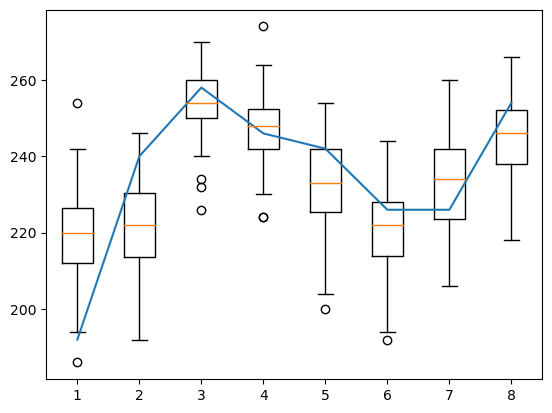

In [93]:
xs =[a[0] for a in df_sum_rands[inds].Attributes]
ys =df_sum_rands[inds].SumBal

fig, ax = plt.subplots()
ax.boxplot(ys);

inds_ = df_sum.G==1
ys2 = df_sum[inds_].SumBal
ax.plot(list(range(1, 9)), ys2)

# b = sns.boxplot(x = xs, y = df_sum_rands[inds].SumBal)

# b.set_xlabel("Number of attributes considered", fontsize = 14)
# b.set_ylabel("p-values of first level test", fontsize = 14)
# b.set_title("", fontsize = 16)

# b.get_figure()

Text(0, 0.5, 'density of balanced triads')

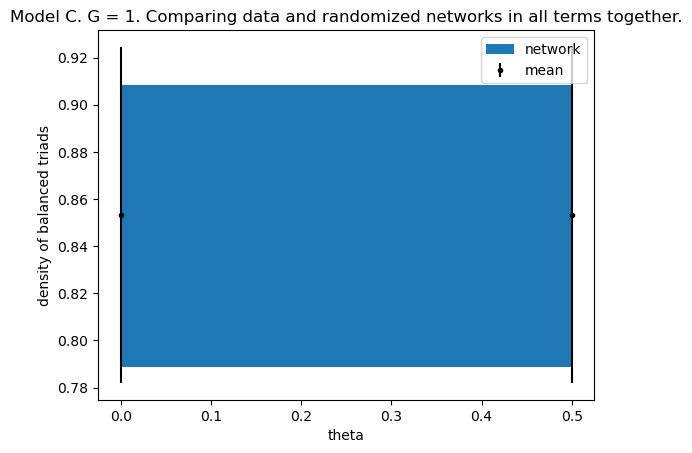

In [94]:
G = 1

inds = df.G == G
df_part = df.loc[inds]
thetas = np.unique(df.Theta[inds])
# print(thetas)

inds_r = df_rands.G == G
df_rands_part = df_rands.loc[inds_r]

pD_means = np.zeros(len(thetas))
pD_stds = np.zeros(len(thetas))

pM_means = np.zeros(len(thetas))
pM_stds = np.zeros(len(thetas))

for it, theta in enumerate(thetas):
    inds2 = df_part.Theta == theta
    pD_means[it] = np.mean(df_part.pD[inds2])
    pD_stds[it] = np.std(df_part.pD[inds2])

    inds2 = df_rands_part.Theta == theta
    pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
    pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])

plt.errorbar(thetas, pD_means, yerr = pD_stds, fmt = 'k.')

plt.fill_between(thetas, pM_means-pM_stds, pM_means+pM_stds)
plt.legend(["network", "mean"])
plt.title("Model C. G = " + str(G) + ". Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

Text(0, 0.5, 'pD-pM')

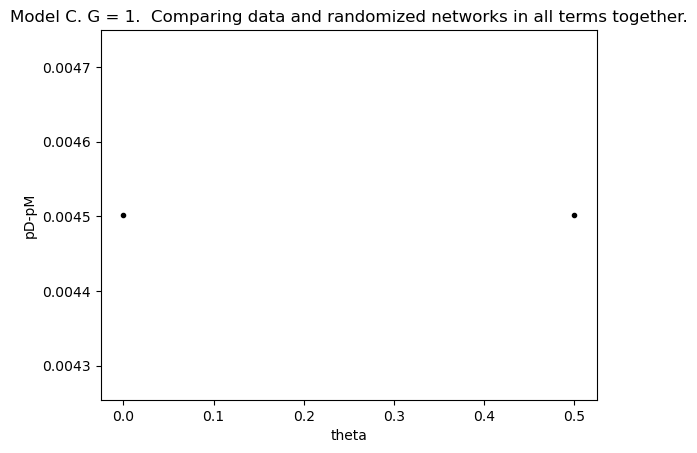

In [95]:

plt.plot(thetas, pD_means - pM_means, 'k.')

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
# plt.legend(["network", "mean"])
plt.title("Model C. G = " + str(G) + ".  Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("pD-pM")

Text(0, 0.5, 'pD-pM')

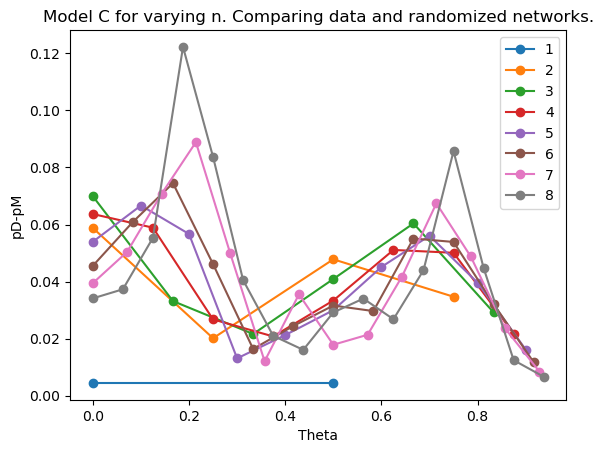

In [96]:
for G in range(1,9):

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.plot(thetas, pD_means - pM_means, marker = "o")

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(list(range(1,9)))
plt.title("Model C for varying n. Comparing data and randomized networks.")
plt.xlabel("Theta")
plt.ylabel("pD-pM")

Text(0, 0.5, 'pD-pM')

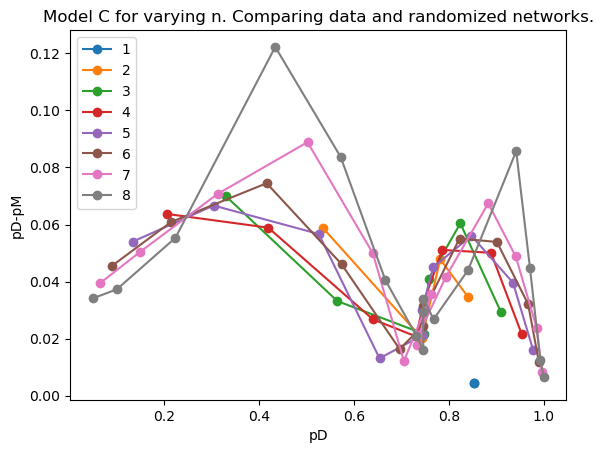

In [97]:
for G in range(1,9):

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.plot(pD_means, pD_means - pM_means, marker = "o")

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(list(range(1,9)))
plt.title("Model C for varying n. Comparing data and randomized networks.")
plt.xlabel("pD")
plt.ylabel("pD-pM")

In [98]:
pM_stds

array([0.014, 0.03 , 0.045, 0.049, 0.052, 0.048, 0.043, 0.04 , 0.05 ,
       0.045, 0.044, 0.048, 0.042, 0.031, 0.015, 0.008])

Text(0, 0.5, 'pD-pM')

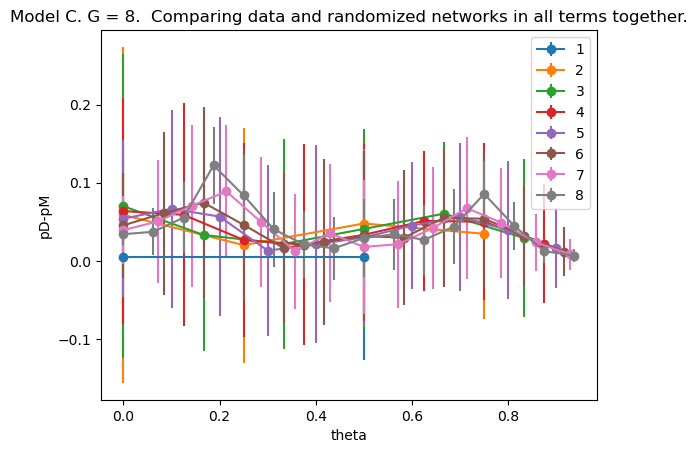

In [99]:
for G in range(1,9):

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.errorbar(thetas, pD_means - pM_means, yerr = pM_stds + pD_stds, marker = "o")

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(list(range(1,9)))
plt.title("Model C. G = " + str(G) + ".  Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("pD-pM")

Text(0, 0.5, 'pM')

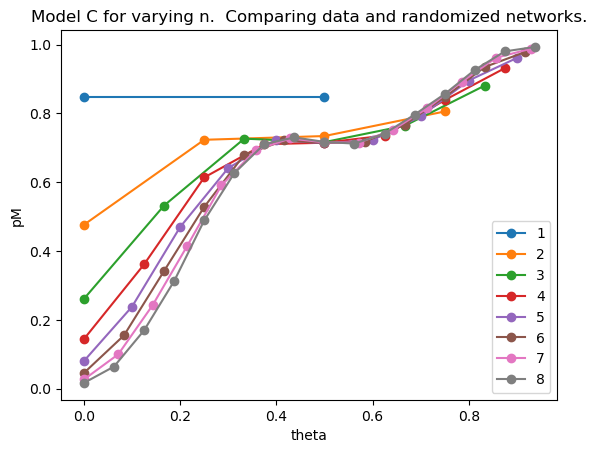

In [6]:
for G in range(1,9):

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.plot(thetas, pM_means, marker = "o")

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(list(range(1,9)))
plt.title("Model C for varying n.  Comparing data and randomized networks.")
plt.xlabel("theta")
plt.ylabel("pM")

Text(0, 0.5, 'pD')

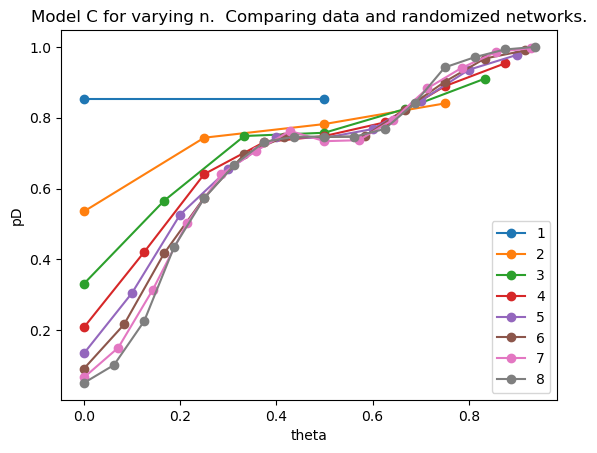

In [7]:
for G in range(1,9):

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.plot(thetas, pD_means, marker = "o")

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(list(range(1,9)))
plt.title("Model C for varying n.  Comparing data and randomized networks.")
plt.xlabel("theta")
plt.ylabel("pD")

# p-value analysis

In [4]:
df.reset_index(drop=True, inplace = True)
df_sum.reset_index(drop=True, inplace = True)

### First level test

Does the whole curve lead to larger densities?

In [61]:
ind=0
df_sum.loc[0]

Attributes          (0,)
G                      1
Thetas        (0.0, 0.5)
SumBal             242.0
pvals               0.02
Name: 0, dtype: object

In [100]:
pvals_T = np.zeros(len(df_sum.index))
lens = np.array([len(arr) for arr in df_sum_rands.SumBal])

for ind, row in df_sum.iterrows():    
    pvals_T[ind] = np.sum(df_sum_rands.iloc[ind].SumBal >= df_sum.iloc[ind].SumBal)

df_sum["pvals"] = pvals_T / lens
df_sum

,Attributes,G,Thetas,SumBal,pvals
0,"(0,)",1,"(0.0, 0.5)",192.0,0.99
1,"(1,)",1,"(0.0, 0.5)",240.0,0.06
2,"(2,)",1,"(0.0, 0.5)",258.0,0.42
3,"(3,)",1,"(0.0, 0.5)",246.0,0.62
4,"(4,)",1,"(0.0, 0.5)",242.0,0.26
...,...,...,...,...,...
250,"(0, 1, 2, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1272.0,0.01
251,"(0, 1, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1268.0,0.01
252,"(0, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1262.0,0.08
253,"(1, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1330.0,0.00


In [66]:
G=7
inds = df_sum.G == G
df_sum.loc[inds]

,Attributes,G,Thetas,SumBal,pvals
246,"(0, 1, 2, 3, 4, 5, 6)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1276.0,0.00
247,"(0, 1, 2, 3, 4, 5, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1236.0,0.19
248,"(0, 1, 2, 3, 4, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1272.0,0.05
249,"(0, 1, 2, 3, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1330.0,0.00
250,"(0, 1, 2, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1290.0,0.01
251,"(0, 1, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1262.0,0.01
252,"(0, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1268.0,0.07
253,"(1, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1236.0,0.21


Text(0, 0.5, 'p-values of first level test')

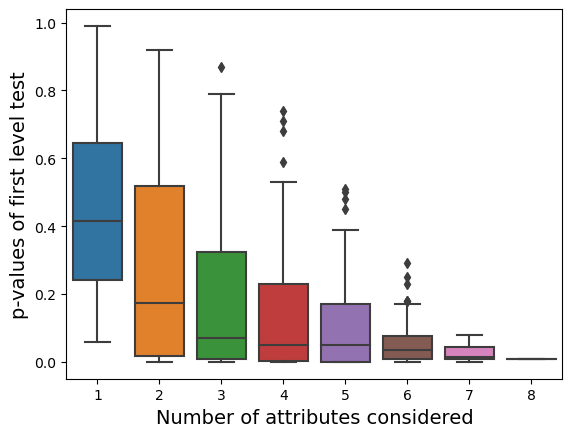

In [101]:
b = sns.boxplot(data = df_sum, x = "G", y = "pvals")

b.set_xlabel("Number of attributes considered", fontsize = 14)
b.set_ylabel("p-values of first level test", fontsize = 14)
# b.set_title("", fontsize = 16)

# b.get_figure()

Text(0, 0.5, 'Ratio of rejected first level tests')

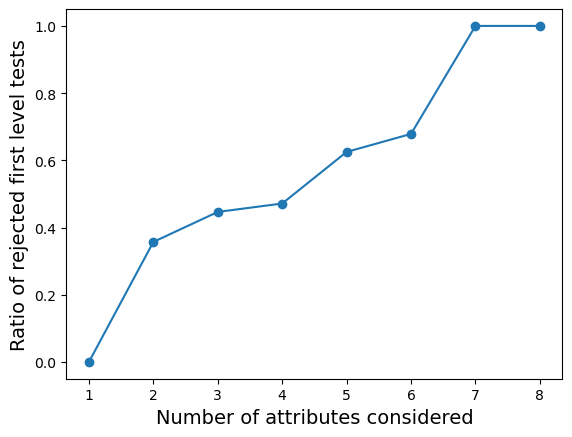

In [10]:
fig, ax = plt.subplots()

prob_reject_1lvl = np.zeros(8)
ns = list(range(1,9))

for n in ns:
    inds = df_sum.G == n
    comb_cnt = len(df_sum.loc[inds])
    prob_reject_1lvl[n-1] = np.sum(df_sum.loc[inds].pvals <= 0.0501 )/ comb_cnt

ax.plot(ns, prob_reject_1lvl, marker="o")
ax.set_xlabel("Number of attributes considered", fontsize = 14)
ax.set_ylabel("Ratio of rejected first level tests", fontsize = 14)

(-0.0495, 1.0395)

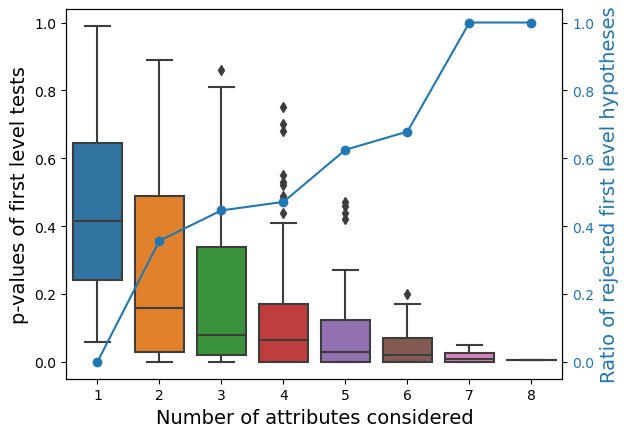

In [11]:
b = sns.boxplot(data = df_sum, x = "G", y = "pvals")

b.set_xlabel("Number of attributes considered", fontsize = 14)
b.set_ylabel("p-values of first level tests", fontsize = 14)
# b.set_title("", fontsize = 16)

ax2 = b.twinx()

ax2.plot(list(range(8)), prob_reject_1lvl, marker="o", color = "tab:blue")
# ax2.set_xlabel("Number of attributes considered", fontsize = 14)
ax2.tick_params(axis='y', labelcolor="tab:blue")
ax2.set_ylabel("Ratio of rejected first level hypotheses", fontsize = 14, color = "tab:blue")
ax2.set_ylim(b.get_ylim())

### Second level test

What are the exact thetas that have small p-values?

In [104]:
pvals_T = np.zeros(len(df.index))
lens = np.array([len(arr) for arr in df_rands.NumBal])

for ind, row in df.iterrows():    
    pvals_T[ind] = np.sum(df_rands.iloc[ind].NumBal >= df.iloc[ind].NumBal)

df["pvals"] = pvals_T / lens
df

,Attributes,Theta,G,NumBal,pD,pvals
0,"(0,)",0.0000,1,96.0,0.695652,0.99
1,"(0,)",0.5000,1,96.0,0.695652,0.99
2,"(1,)",0.0000,1,120.0,0.869565,0.06
3,"(1,)",0.5000,1,120.0,0.869565,0.06
4,"(2,)",0.0000,1,129.0,0.934783,0.42
...,...,...,...,...,...,...
2043,"(0, 1, 2, 3, 4, 5, 6, 7)",0.6875,8,116.0,0.840580,0.22
2044,"(0, 1, 2, 3, 4, 5, 6, 7)",0.7500,8,130.0,0.942029,0.02
2045,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8125,8,134.0,0.971014,0.07
2046,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8750,8,137.0,0.992754,0.32


In [77]:
G=8
inds = df_rands.G == G
df_rands.loc[inds]

,Attributes,Theta,G,NumBal,pD
2032,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0000,8,"[1.0, 3.0, 0.0, 0.0, 2.0, 0.0, 2.0, 4.0, 3.0, ...","[0.007246376811594203, 0.021739130434782608, 0..."
2033,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0625,8,"[5.0, 9.0, 4.0, 9.0, 11.0, 7.0, 5.0, 14.0, 11....","[0.036231884057971016, 0.06521739130434782, 0...."
2034,"(0, 1, 2, 3, 4, 5, 6, 7)",0.1250,8,"[21.0, 25.0, 17.0, 32.0, 25.0, 18.0, 22.0, 30....","[0.15217391304347827, 0.18115942028985507, 0.1..."
2035,"(0, 1, 2, 3, 4, 5, 6, 7)",0.1875,8,"[29.0, 38.0, 44.0, 59.0, 42.0, 26.0, 34.0, 43....","[0.21014492753623187, 0.2753623188405797, 0.31..."
2036,"(0, 1, 2, 3, 4, 5, 6, 7)",0.2500,8,"[63.0, 59.0, 62.0, 75.0, 60.0, 61.0, 67.0, 65....","[0.45652173913043476, 0.427536231884058, 0.449..."
2037,"(0, 1, 2, 3, 4, 5, 6, 7)",0.3125,8,"[78.0, 87.0, 77.0, 84.0, 93.0, 79.0, 88.0, 88....","[0.5652173913043478, 0.6304347826086957, 0.557..."
2038,"(0, 1, 2, 3, 4, 5, 6, 7)",0.3750,8,"[100.0, 93.0, 96.0, 94.0, 110.0, 90.0, 98.0, 9...","[0.7246376811594203, 0.6739130434782609, 0.695..."
2039,"(0, 1, 2, 3, 4, 5, 6, 7)",0.4375,8,"[106.0, 106.0, 105.0, 101.0, 110.0, 98.0, 105....","[0.7681159420289855, 0.7681159420289855, 0.760..."
2040,"(0, 1, 2, 3, 4, 5, 6, 7)",0.5000,8,"[112.0, 104.0, 100.0, 99.0, 109.0, 91.0, 100.0...","[0.8115942028985508, 0.7536231884057971, 0.724..."
2041,"(0, 1, 2, 3, 4, 5, 6, 7)",0.5625,8,"[95.0, 100.0, 95.0, 90.0, 107.0, 92.0, 94.0, 9...","[0.6884057971014492, 0.7246376811594203, 0.688..."


In [79]:
G=8
inds = df.G == G
df.loc[inds]

,Attributes,Theta,G,NumBal,pD,pvals
2032,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0000,8,7.0,0.050725,0.06
2033,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0625,8,14.0,0.101449,0.14
2034,"(0, 1, 2, 3, 4, 5, 6, 7)",0.1250,8,31.0,0.224638,0.11
2035,"(0, 1, 2, 3, 4, 5, 6, 7)",0.1875,8,60.0,0.434783,0.02
2036,"(0, 1, 2, 3, 4, 5, 6, 7)",0.2500,8,79.0,0.572464,0.07
2037,"(0, 1, 2, 3, 4, 5, 6, 7)",0.3125,8,92.0,0.666667,0.22
2038,"(0, 1, 2, 3, 4, 5, 6, 7)",0.3750,8,101.0,0.731884,0.39
2039,"(0, 1, 2, 3, 4, 5, 6, 7)",0.4375,8,103.0,0.746377,0.37
2040,"(0, 1, 2, 3, 4, 5, 6, 7)",0.5000,8,103.0,0.746377,0.31
2041,"(0, 1, 2, 3, 4, 5, 6, 7)",0.5625,8,103.0,0.746377,0.24


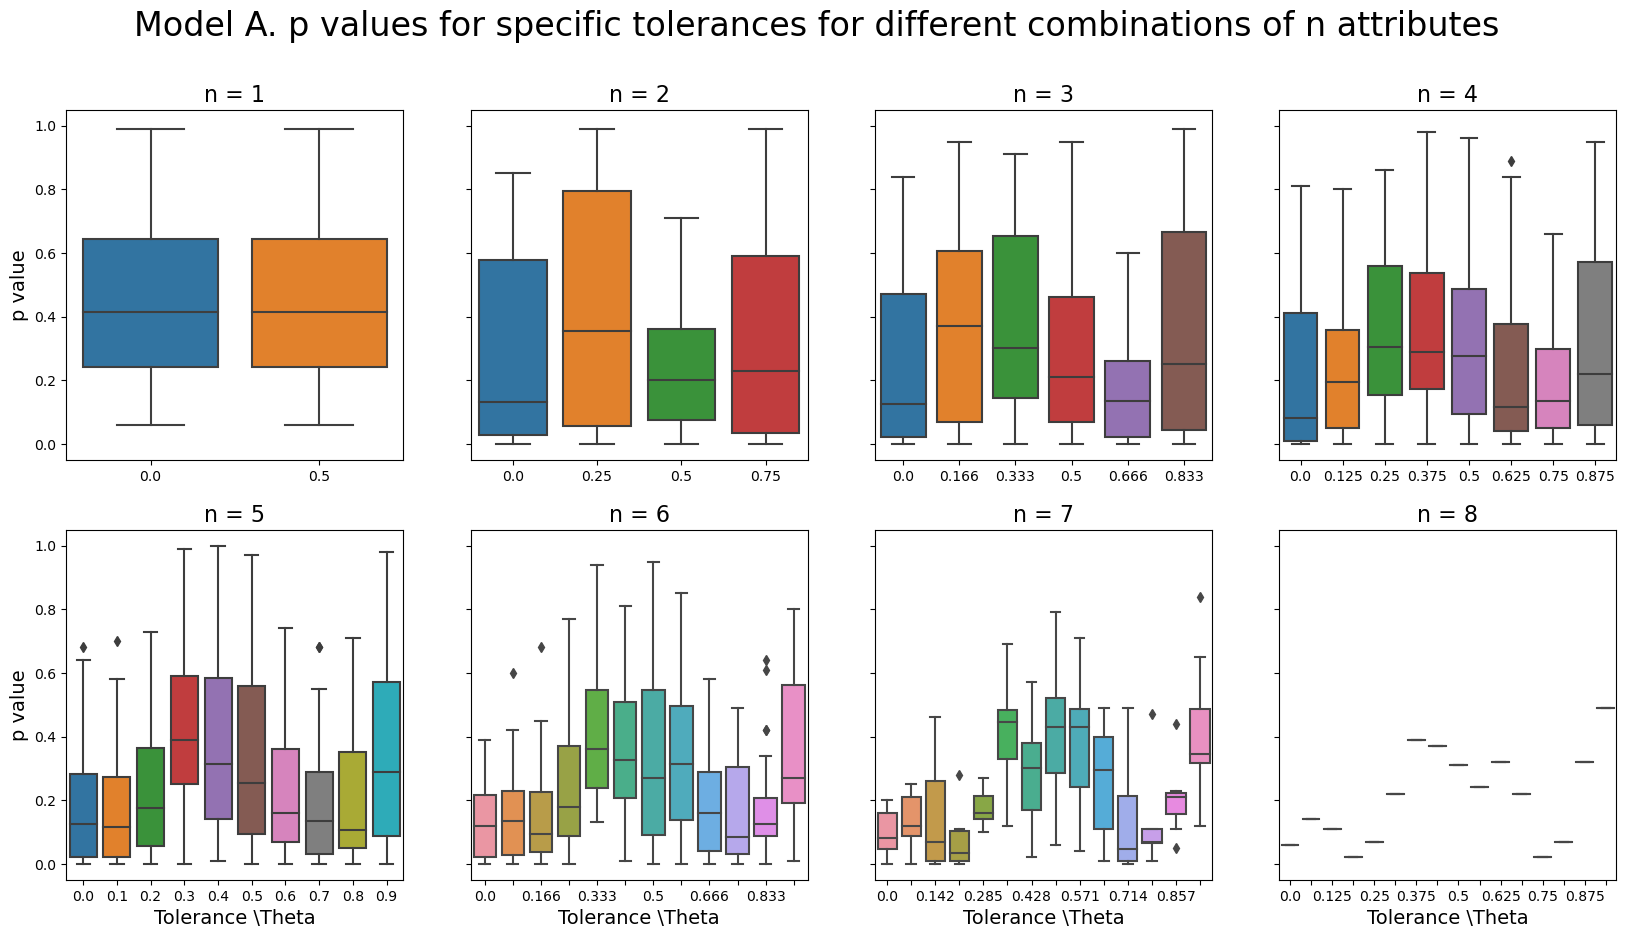

In [105]:
dim1 = 2
dim2 = 4
fig, axs = plt.subplots(dim1, dim2, sharey=True)
fig.set_size_inches(20,10)

fig.suptitle("Model A. p values for specific tolerances for different combinations of n attributes", 
            fontsize = 24)

G=1
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        inds = df.G == G
        b = sns.boxplot(ax = axs[a1, a2], data = df.loc[inds], x = "Theta", y = "pvals")

        xtl = b.get_xticklabels()
        
        """Changing the number of decimals printed"""
        for it in range(len(xtl)):
            xt = xtl[it].get_text()
            xt = xt[:5]
            xtl[it].set_text(xt)
            b.set_xticklabels(xtl)
        
        if len(xtl) > 10:
            even = False
            for it in range(len(xtl)):
                if even:
                    xtl[it].set_text("")
                even = not even
            b.set_xticklabels(xtl)
        
        b.set_title("n = " + str(G), fontsize = 16)
        
        if a2 == 0:
            b.set_ylabel("p value", fontsize = 14)
        else:
            b.set_ylabel("", fontsize = 14)
        
        if a1 == 0:
            b.set_xlabel("", fontsize = 14)
        else:
            b.set_xlabel("Tolerance \Theta", fontsize = 14)
        
        G += 1
#         b.set_xlabel("Theta", fontsize = 14)
#         b.set_ylabel("p-values of second level test", fontsize = 14)

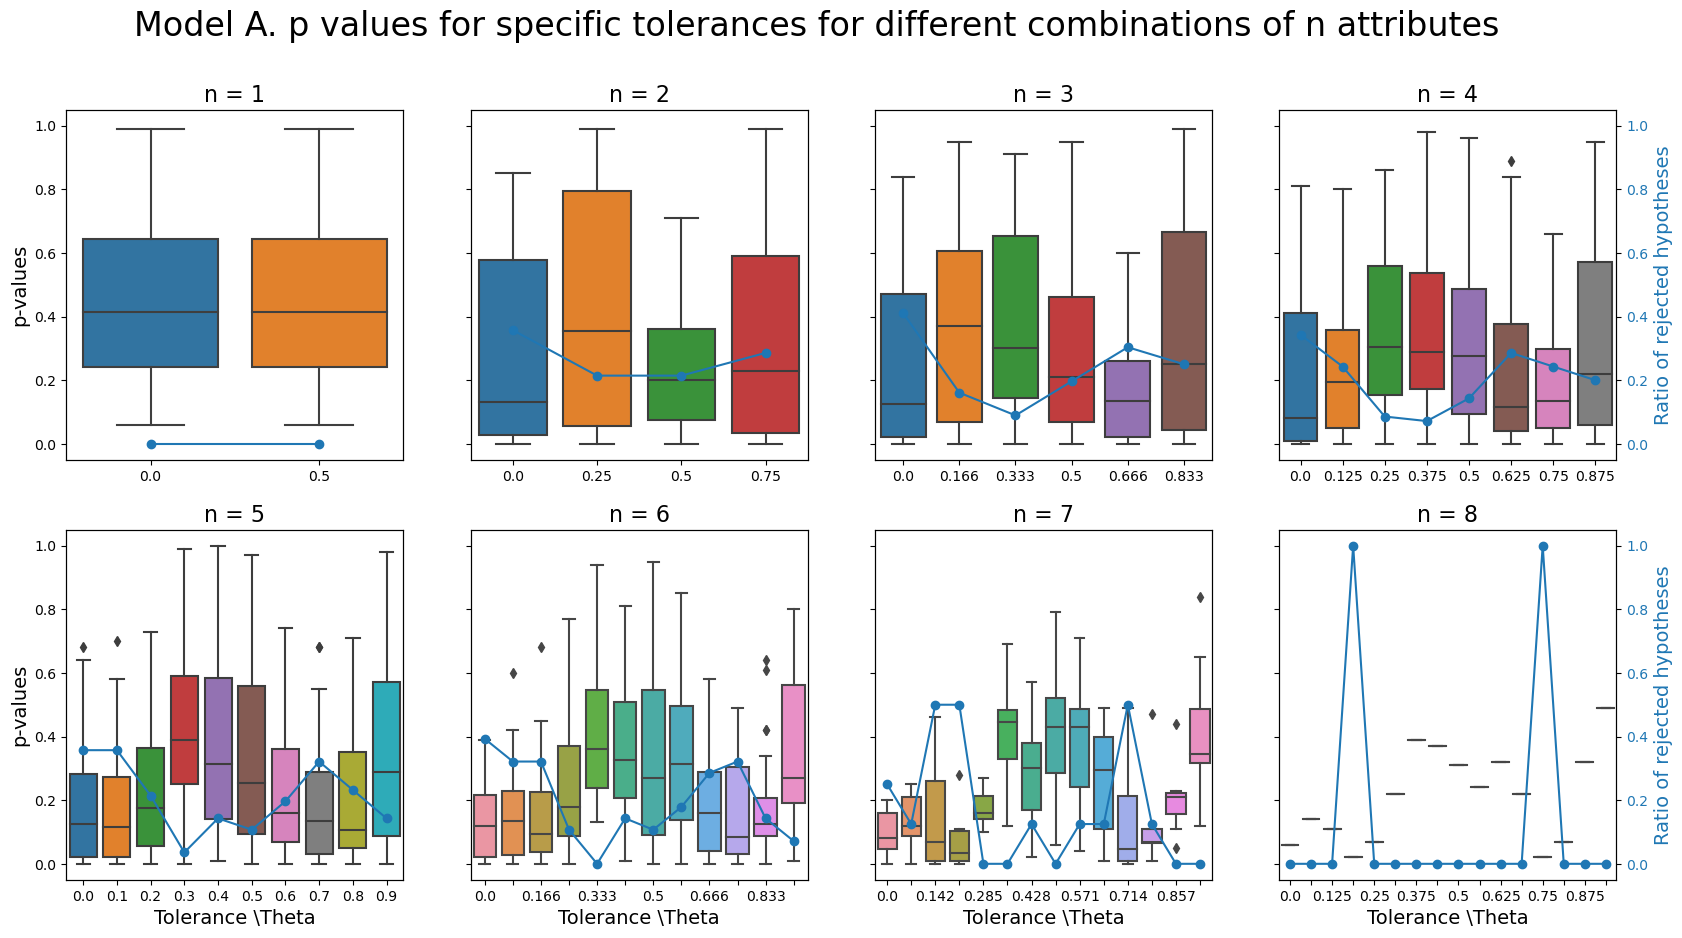

In [106]:
dim1 = 2
dim2 = 4
fig, axs = plt.subplots(dim1, dim2, sharey=True)
fig.set_size_inches(20,10)
secaxes = []  

fig.suptitle("Model A. p values for specific tolerances for different combinations of n attributes", 
            fontsize = 24)

G=1
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        inds = df.G == G
        
        thetas = np.unique(df.loc[inds].Theta)
        
        prob_reject_2lvl = np.zeros(len(thetas))
        
        for it, theta in enumerate(thetas):
            inds2 = df.loc[inds].Theta == theta
            comb_cnt = len(df.loc[inds].loc[inds2].pvals)
            prob_reject_2lvl[it] = np.sum(df.loc[inds].loc[inds2].pvals < 0.05) / comb_cnt
#         if G == 8:
#             print(len(inds2))
        
        b = sns.boxplot(ax = axs[a1, a2], data = df.loc[inds], x = "Theta", y = "pvals")

        ax2 = b.twinx()
        secaxes.append(ax2)
        if G > 1:
            ax2.sharey(secaxes[0])
        
        ax2.plot(prob_reject_2lvl, marker="o", color = "tab:blue")
        # ax2.set_xlabel("Number of attributes considered", fontsize = 14)
        ax2.tick_params(axis='y', labelcolor="tab:blue")        
        
        xtl = b.get_xticklabels()
        
        """Changing the number of decimals printed"""
        for it in range(len(xtl)):
            xt = xtl[it].get_text()
            xt = xt[:5]
            xtl[it].set_text(xt)
            b.set_xticklabels(xtl)
        
        if len(xtl) > 10:
            even = False
            for it in range(len(xtl)):
                if even:
                    xtl[it].set_text("")
                even = not even
            b.set_xticklabels(xtl)
        
        b.set_title("n = " + str(G), fontsize = 16)
        
        if a2 == 0:
            b.set_ylabel("p-values", fontsize = 14)
        else:
            b.set_ylabel("", fontsize = 14)
        
        if a1 == 0:
            b.set_xlabel("", fontsize = 14)
        else:
            b.set_xlabel("Tolerance \Theta", fontsize = 14)
        
        if a2 == 3:
            ax2.set_ylabel("Ratio of rejected hypotheses", fontsize = 14, color = "tab:blue")
        else:
#             ax2.get_yaxis().set_ticks([]) 
            ax2.get_yaxis().set_visible(False) 
            ax2.set_ylabel("")
        
        
        G += 1
#         b.set_xlabel("Theta", fontsize = 14)
#         b.set_ylabel("p-values of second level test", fontsize = 14)
# secaxes[0].get_shared_y_axes().join(*secaxes)
# secaxes[0].sharey(secaxes)

In [22]:
np.sum(bal_dens_sum > bal_dens_rands_sum ), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(978, 978)

In [51]:
# 1: 99,99 / M = 100 / 1-6 / no error
# 2: 100,100 / M = 100
# 3: 100,100 / M = 100
# 4: 100,100 / M = 100

In [31]:
pvals_T = np.zeros(len(test_all_agents_terms_together_thetas))

for i, theta in enumerate(test_all_agents_terms_together_thetas):    
    pvals_T[i] = np.sum(test_all_agents_terms_together_bal_dens_rands[:,i] >= test_all_agents_terms_together_bal_dens[i])

pvals_T

array([  28.,   28.,   28.,   28.,   28.,   28.,   28.,  130.,  130.,
        130.,  130.,  130.,  130.,  142.,  142.,  142.,  142.,  142.,
        142.,   17.,   17.,   17.,   17.,   17.,   17.,   72.,   72.,
         72.,   72.,   72.,   72.,   72.,  204.,  204.,  204.,  204.,
        204.,  204.,  387.,  387.,  387.,  387.,  387.,  387.,  422.,
        422.,  422.,  422.,  422.,  422.,  321.,  321.,  321.,  321.,
        321.,  321.,  321.,  258.,  258.,  258.,  258.,  258.,  258.,
        283.,  283.,  283.,  283.,  283.,  283.,  177.,  177.,  177.,
        177.,  177.,  177.,   23.,   23.,   23.,   23.,   23.,   23.,
         23.,   96.,   96.,   96.,   96.,   96.,   96.,  444.,  444.,
        444.,  444.,  444.,  444.,  641.,  641.,  641.,  641.,  641.,
        641., 1000.])

In [67]:
pvals_T_res1 = np.array([ 15.,  15.,  15.,  15.,  15.,  15.,  15.,  31.,  31.,  31.,  31.,
        31.,  31.,  20.,  20.,  20.,  20.,  20.,  20.,   1.,   1.,   1.,
         1.,   1.,   1.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,  38.,
        38.,  38.,  38.,  38.,  38.,  47.,  47.,  47.,  47.,  47.,  47.,
        62.,  62.,  62.,  62.,  62.,  62.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  17.,  17.,  17.,  17.,  17.,  17.,  15.,  15.,  15.,
        15.,  15.,  15.,   2.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        19.,  19.,  19.,  19.,  19.,  19.,  30.,  30.,  30.,  30.,  30.,
        30., 100.])
pvals_T_res2 = np.array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,  11.,  11.,  11.,  11.,
        11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,   2.,   2.,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,  25.,
        25.,  25.,  25.,  25.,  25.,  39.,  39.,  39.,  39.,  39.,  39.,
        35.,  35.,  35.,  35.,  35.,  35.,  26.,  26.,  26.,  26.,  26.,
        26.,  26.,  24.,  24.,  24.,  24.,  24.,  24.,  25.,  25.,  25.,
        25.,  25.,  25.,  18.,  18.,  18.,  18.,  18.,  18.,   3.,   3.,
         3.,   3.,   3.,   3.,   3.,  14.,  14.,  14.,  14.,  14.,  14.,
        42.,  42.,  42.,  42.,  42.,  42.,  58.,  58.,  58.,  58.,  58.,
        58., 100.])

pvals_T_res3 = np.array([  2.,   2.,   2.,   2.,   2.,   2.,   2.,  11.,  11.,  11.,  11.,
        11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,   2.,   2.,   2.,
         2.,   2.,   2.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,  20.,
        20.,  20.,  20.,  20.,  20.,  36.,  36.,  36.,  36.,  36.,  36.,
        37.,  37.,  37.,  37.,  37.,  37.,  24.,  24.,  24.,  24.,  24.,
        24.,  24.,  23.,  23.,  23.,  23.,  23.,  23.,  20.,  20.,  20.,
        20.,  20.,  20.,  16.,  16.,  16.,  16.,  16.,  16.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   8.,   8.,   8.,   8.,   8.,   8.,
        57.,  57.,  57.,  57.,  57.,  57.,  69.,  69.,  69.,  69.,  69.,
        69., 100.])

In [68]:
pvals_T_res1 + pvals_T_res2 + pvals_T_res3

array([ 18.,  18.,  18.,  18.,  18.,  18.,  18.,  53.,  53.,  53.,  53.,
        53.,  53.,  42.,  42.,  42.,  42.,  42.,  42.,   5.,   5.,   5.,
         5.,   5.,   5.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  83.,
        83.,  83.,  83.,  83.,  83., 122., 122., 122., 122., 122., 122.,
       134., 134., 134., 134., 134., 134.,  82.,  82.,  82.,  82.,  82.,
        82.,  82.,  64.,  64.,  64.,  64.,  64.,  64.,  60.,  60.,  60.,
        60.,  60.,  60.,  36.,  36.,  36.,  36.,  36.,  36.,   3.,   3.,
         3.,   3.,   3.,   3.,   3.,  22.,  22.,  22.,  22.,  22.,  22.,
       118., 118., 118., 118., 118., 118., 157., 157., 157., 157., 157.,
       157., 300.])

In [112]:
[(theta, pval) for theta, pval in zip(thetas, pvals_T) if pval < 5];

Text(0, 0.5, 'density of balanced triads in all sems')

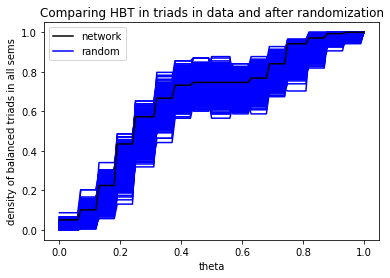

In [32]:
handles_rand = plt.plot(test_all_agents_terms_together_thetas, np.array(test_all_agents_terms_together_bal_dens_rands).T, 'b')
handles_net, = plt.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k')
# plt.legend(["network", "random"], handles = [handles_net, handles_rand[0]])
plt.legend([handles_net, handles_rand[0]], ["network", "random"])
plt.title("Comparing HBT in triads in data and after randomization")
plt.xlabel("theta")
plt.ylabel("density of balanced triads in all sems")

In [70]:
handles_net

Text(0, 0.5, 'density of balanced triads')

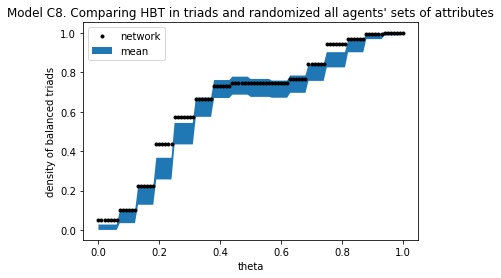

In [34]:
mean_vals = np.mean(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)
std_vals = np.std(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)

plt.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k.')

plt.fill_between(test_all_agents_terms_together_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Model C8. Comparing HBT in triads and randomized all agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

Text(0, 0.5, 'p_D-p_M')

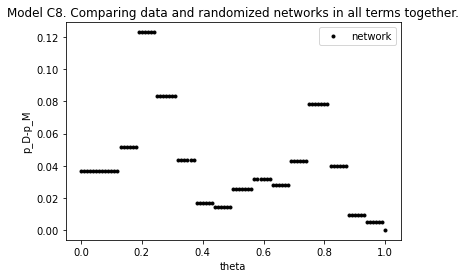

In [35]:
# mean_vals = np.mean(np.array(test_triads_A8_bal_dens_rands).T,1)
# std_vals = np.std(np.array(test_triads_A8_bal_dens_rands).T,1)

plt.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens - mean_vals, 'k.')

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Model C8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("p_D-p_M")

Text(0, 0.5, 'p_D-p_M')

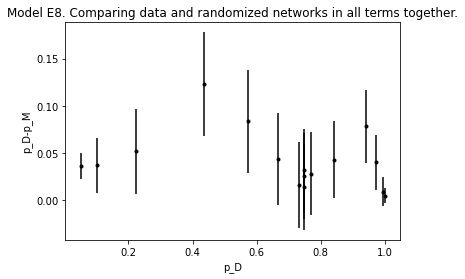

In [36]:
mean_vals = np.mean(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)
std_vals = np.std(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)

distances = np.array([x/16 for x in range(0,17)])
pds = np.array([test_all_agents_terms_together_bal_dens[np.where(test_all_agents_terms_together_thetas >= distances[i])[0][0]] for i in range(0, len(distances) - 1)])
pms = np.array([mean_vals[np.where(test_all_agents_terms_together_thetas >= distances[i])[0][0]] for i in range(0, len(distances) - 1)])
stds = np.array([std_vals[np.where(test_all_agents_terms_together_thetas >= distances[i])[0][0]] for i in range(0, len(distances) - 1)]) 

plt.errorbar(pds, pds - pms, yerr = stds, fmt = 'k.')

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
# plt.legend(["network", "mean"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("p_D")
plt.ylabel("p_D-p_M")

In [127]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

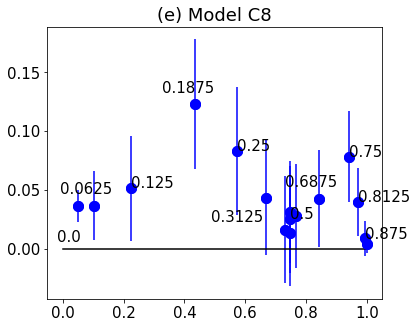

In [40]:
fig, ax = plt.subplots()


chosen_dists = [i/8 for i in range(0,8)]
chosen_dists = [i/16 for i in range(0,16)]

anno_dists = [0, 1/16, 0.125, 3/16, 4/16, 5/16, 0.5,   11/16, 12/16, 13/16, 14/16]

ddd = {0: (-0.07, -0.03),
       1/16: (-0.11, 0.01),
       2/16: (0,0),
       3/16: (-0.11, 0.01),
       4/16: (0,0),
       5/16: (-0.18,-0.02),
       6/16: (0,0),
       7/16: (0,0),
       8/16: (0,0),
       9/16: (0,0),
       10/16: (0,0),
       11/16: (-0.11, 0.01),
       12/16: (0,0),
       13/16: (0,0),
       14/16: (0,0),
       15/16: (0,0)
      }


for i, dist in enumerate(distances):
    if dist not in chosen_dists:
        continue
    dif = pds[i] - pms[i]
    ax.plot(pds[i], dif, color='blue', marker='o', linestyle='', markersize=10, label=str(dist))
    plt.errorbar(x=pds[i], y=dif,yerr=stds[i],  color='blue', marker='o', markersize=10, label=str(dist))
    if dist == 0.75:
        xy = (pds[i] + 0.02, dif-0.01)
    elif dist in [7/8]:
        xy = (pds[i]-0.00, dif + 0.0)
    elif dist in [6/16]:
        xy = (pds[i] + 0.01, dif + 0.02)
    elif dist in [8/16]:
        xy = (pds[i] + 0.01, dif - 0.02)
    elif dist in [1/16, 3/16]:
        xy = (pds[i]-0.11, dif + 0.01)
    elif dist in [11/16]:
        xy = (pds[i]-0.06, dif + 0.01)
    elif dist in [5/16]:
        xy = (pds[i]-0.15, dif + 0.01)
    elif dist in [0, 0.25]:
        xy = (pds[i]-0.07, dif - 0.03)
    elif dist in [0.625]:
        xy = (pds[i]-0.15, dif - 0.03)
#     elif dist == 0:
#         xy = (pds[i]-0.07, dif - 0.03)
    else:
        xy = (pds[i], dif)
    
    xy = (pds[i] + ddd[dist][0], dif + ddd[dist][1])
#     print(xy)
    
    if dist in anno_dists:
        ax.annotate(str(dist),xy=xy)
    #, xytext=(-40,-10), textcoords='offset points')

#plt.rcParams.update({'font.size': 40})
plt.title('(e) Model C8')
fig.set_size_inches(6, 5)
plt.rcParams.update({'font.size': 15})
plt.plot((0,1),(0,0), color='black')


plt.savefig("modelC8v2.pdf",dpi=600,bbox_inches='tight',format='pdf')

with open(f'C8.pkl','wb') as fid:
    pickle.dump(fig, fid)

In [192]:
(pms - pds) / pds

array([-0.72547619, -0.3572619 , -0.22887097, -0.28083333, -0.14320675,
       -0.06418478, -0.02193069, -0.01700647, -0.03346278, -0.04223301,
       -0.03638365, -0.05070402, -0.08285897, -0.04094527, -0.00914842,
       -0.00504831])

Text(0, 0.5, 'density of balanced triads')

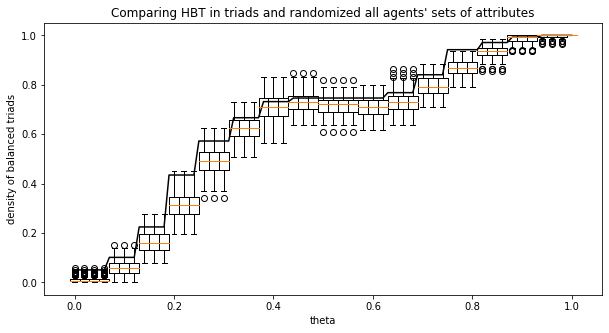

In [72]:
fig, axs = plt.subplots()
fig.set_size_inches(10,5)

every = 2

axs.boxplot(np.array(test_all_agents_terms_together_bal_dens_rands[:,::every]),positions = thetas[::every], widths = 0.02, manage_ticks = False)
# axs.margins(x = -0.2)
# axs.xticks([1, 2, 3], ['mon', 'tue', 'wed'])

axs.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k')
axs.set_title("Comparing HBT in triads and randomized all agents' sets of attributes")
axs.set_xlabel("theta")
axs.set_ylabel("density of balanced triads")

In [87]:
#Lets see if we still have such a good result, when we remove initial few ticks. 
th_left = 0.25
th_right = 0.8

th_chosen = (th_left < thetas) * (thetas < th_right)
new_bds = np.sum(bal_dens[th_chosen])
new_bdsr = np.sum(bal_dens_rands[:,th_chosen],1)
np.sum(new_bds > new_bdsr), np.sum(new_bds >= new_bdsr)

(97, 97)

In [80]:
(th_left < thetas) * (thetas < th_right)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [357]:
bal_dens_rands[:,thetas > 0.15]

array([[0.014, 0.036, 0.065, ..., 1.   , 1.   , 1.   ],
       [0.029, 0.029, 0.029, ..., 1.   , 1.   , 1.   ],
       [0.   , 0.036, 0.036, ..., 1.   , 1.   , 1.   ],
       ...,
       [0.043, 0.051, 0.094, ..., 1.   , 1.   , 1.   ],
       [0.036, 0.036, 0.043, ..., 1.   , 1.   , 1.   ],
       [0.036, 0.043, 0.058, ..., 1.   , 1.   , 1.   ]])

In [56]:
first_sem = 2
last_sem = 6
thetas = np.linspace(0,1,101)
M = 100

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
attr_rands_M = [randomize_attribute_sets(ord_attributes) for i in range(0,M)] 

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(ord_attributes[semm], theta, 2)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = calc_link_polarities2(attr_rands_M[j][semm], theta, 2)
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

test_all_agents_terms_together_thetas2 = thetas
test_all_agents_terms_together_bal_dens2 = bal_dens / triads_all_num
test_all_agents_terms_together_bal_dens_rands2 = bal_dens_rands / triads_all_num

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(6350.0,
 array([5579., 5626., 5922., 5472., 6059., 5868., 5844., 5836., 5773.,
        6121., 5547., 5728., 6244., 5728., 5659., 5622., 5980., 5576.,
        6065., 6116., 5986., 5994., 5805., 5701., 5733., 6092., 5620.,
        6054., 5958., 5800., 6008., 6049., 5836., 5635., 6026., 5775.,
        5904., 6115., 5990., 5953., 5714., 5783., 5795., 5927., 6033.,
        5410., 6372., 5749., 5650., 5493., 5799., 5985., 5640., 5900.,
        5943., 5852., 6030., 5826., 5856., 5623., 5700., 5658., 5944.,
        5984., 5899., 5929., 5722., 5785., 5722., 5577., 5774., 5933.,
        5543., 5783., 5505., 6039., 5662., 5981., 5695., 5735., 5707.,
        5617., 5618., 5989., 6073., 5805., 5692., 5537., 6257., 5770.,
        5922., 5750., 5996., 6083., 5739., 5703., 5992., 6037., 5520.,
        5518.]))

In [58]:
np.sum(bal_dens_sum > bal_dens_rands_sum), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(99, 99)

In [91]:
# 1: 100,100 / M = 100
# 2: 99,99 / M = 100

In [92]:
bal_dens_sum = 6350

In [97]:
#Lets see if we still have such a good result, when we remove initial few ticks. 
th_left = 0.25
th_right = 0.6

th_chosen = (th_left < thetas) * (thetas < th_right)
new_bds = np.sum(bal_dens[th_chosen])
new_bdsr = np.sum(bal_dens_rands[:,th_chosen],1)
np.sum(new_bds > new_bdsr), np.sum(new_bds >= new_bdsr)



(93, 93)

In [60]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] >= bal_dens[i])

pvals_T, [(theta, pval) for theta, pval in zip(thetas, pvals_T) if pval < 5]

(array([  7.,   7.,   7.,   7.,   7.,   7.,   7.,  11.,  11.,  11.,  11.,
         11.,  11.,   3.,   3.,   3.,   3.,   3.,   3.,   1.,   1.,   1.,
          1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  28.,
         28.,  28.,  28.,  28.,  28.,  28.,  28.,  28.,  28.,  28.,  28.,
         44.,  44.,  44.,  44.,  44.,  44.,  29.,  29.,  29.,  29.,  29.,
         29.,  29.,  23.,  23.,  23.,  23.,  23.,  23.,  29.,  29.,  29.,
         29.,  29.,  29.,  10.,  10.,  10.,  10.,  10.,  10.,  15.,  15.,
         15.,  15.,  15.,  15.,  15.,  16.,  16.,  16.,  16.,  16.,  16.,
         30.,  30.,  30.,  30.,  30.,  30.,  67.,  67.,  67.,  67.,  67.,
         67., 100.]),
 [(0.13, 3.0),
  (0.14, 3.0),
  (0.15, 3.0),
  (0.16, 3.0),
  (0.17, 3.0),
  (0.18, 3.0),
  (0.19, 1.0),
  (0.2, 1.0),
  (0.21, 1.0),
  (0.22, 1.0),
  (0.23, 1.0),
  (0.24, 1.0),
  (0.25, 0.0),
  (0.26, 0.0),
  (0.27, 0.0),
  (0.28, 0.0),
  (0.29, 0.0),
  (0.3, 0.0),
  (0.31, 0.0)])

In [ ]:
mean_vals = np.mean(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)
std_vals = np.std(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)

plt.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k.')

plt.fill_between(thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized all agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

# One randomization of agents. Keeping attribute sets across all semesters

In [63]:
len(data[1].nodes)

98

In [64]:
len(data[2].nodes)

89

In [69]:
len(data[3].nodes)

68

# Randomizing triads in the whole network

In [25]:
def randomize_all_attributes(attr, randomized_agents = []):
    N, A = attr.shape
    
    if len(randomized_agents) == 0:
        randomized_agents = list(range(0,N))
    
    attr_rand = np.copy(attr)
    
    attr_copy = attr_rand[randomized_agents]
    
    np.random.shuffle(attr_copy)
    
    attr_rand[randomized_agents] = attr_copy
    
    return attr_rand

def randomize_attribute_sets(ord_attributes, randomized_agents_sets = []):
    rand_ord_attributes = dict((i, 0) for i in range(1,7))
    
    for sem in range(1,7):
        if len(randomized_agents_sets) == 0:
            randomized_agents = []
        else:
            randomized_agents = randomized_agents_sets[sem-1]
        rand_ord_attributes[sem] = randomize_all_attributes(ord_attributes[sem], randomized_agents)
    
    return rand_ord_attributes

""" Not working, because there are different student sets in each term. 
"""
def randomize_correlated(ord_attributes):
    rand_ord_attributes = dict((i, 0) for i in range(1,7))
    
    

def compare_bal_triads(triads, agents, th, attr_dif, M, randomized_agents = []):
    """
    triads - list of sets of node ids forming a triad
    agents - array of vectors of agent attributes
    th - threshold used
    attr_dif - max difference between attributes
    M - number of times to repeat randomization
    """
    polarities = calc_link_polarities2(agents, th, attr_dif)
    bal_dens = balanced_triad_density_network(polarities, triads)
    
    bal_dens_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents, randomized_agents)
        polarities_rand = calc_link_polarities2(agents_rand, th, attr_dif)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
        
    pval = np.sum(bal_dens_rands > bal_dens)
    
    return bal_dens_rands, bal_dens, pval

def compare_networks(data, th, attr_dif, M):
    pvals = np.zeros(6)
    vals = np.zeros(6)
    stds = np.zeros(6)
    difs = np.zeros(6)
    
    for n in range(1,7):
#         print(n)
        net = data[n]
        triads = get_triads(net)
        agents = ord_attributes[n]
        
        bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, agents, th, attr_dif, M)
        pvals[n-1] = pval
        vals[n - 1] = bal_dens
        difs[n-1] = np.mean(bal_dens - bal_dens_rands)
        stds[n-1] = np.std(difs)
    return pvals, vals, difs, stds

def compare_weighted_network(net, agents, th, attr_dif, M):
    polarities = calc_link_polarities2(agents, th, attr_dif)
    U_data, pval_data = compare_weighted_links(net, polarities)
    
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents)
        polarities_rand = calc_link_polarities2(agents_rand, th, attr_dif)
        U_rands[i], pval_rands[i] = compare_weighted_links(net, polarities_rand)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

def compare_weighted_networks(data, ord_attributes, th, attr_dif, M):
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    U_data, pval_data = compare_all_weighted_links(data, ord_attributes, th, attr_dif)
    
    for i in range(0,M):
        rand_ord_attributes = randomize_attribute_sets(ord_attributes)
        U_rands[i], pval_rands[i] = compare_all_weighted_links(data, rand_ord_attributes, th, attr_dif)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

In [114]:
bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, ord_attributes[sem], 0.5, 2, 100)

In [115]:
np.sum(bal_dens_rands > bal_dens), np.mean(bal_dens_rands) - bal_dens, pval

(17, -0.07750000000000012, 17)

In [117]:
sem = 1
triads = get_triads(data[sem])

thetas = np.linspace(0,1,15)

bals = np.zeros(len(thetas))
rand_bals_mean = np.zeros(len(thetas))
rand_bals_std = np.zeros(len(thetas))
pvals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    rand_bal, bal, pval = compare_bal_triads(triads, ord_attributes[sem], theta, 2, 100)
    rand_bals_mean[i] = np.mean(rand_bal)
    rand_bals_std[i] = np.std(rand_bal)
    bals[i] = bal
    pvals[i] = pval


Text(0, 0.5, 'density of balanced triads')

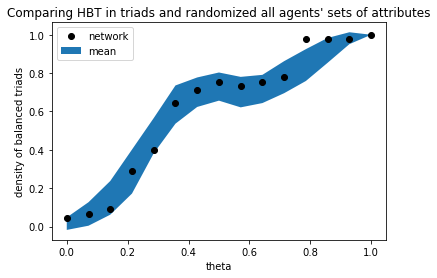

In [118]:
plt.plot(thetas, bals, 'ko')
# plt.plot(thetas, rand_bals_mean)
plt.fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized all agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [119]:
pvals

array([ 8., 35., 65., 41., 73., 45., 44., 31., 25., 24., 49.,  2., 13.,
       63.,  0.])

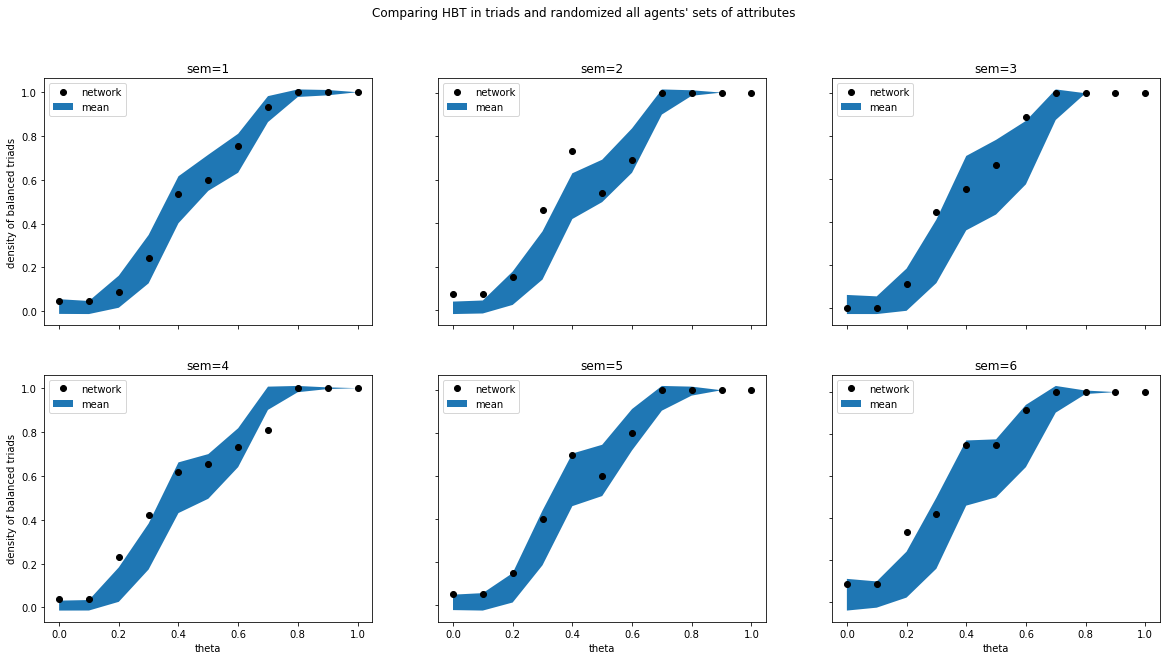

In [349]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,11)
pvals = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and randomized all agents' sets of attributes")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        triads = get_triads(data[semm])

        bals = np.zeros(len(thetas))
        rand_bals_mean = np.zeros(len(thetas))
        rand_bals_std = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[semm], theta, max_dif3, 100)
            rand_bals_mean[i] = np.mean(rand_bal)
            rand_bals_std[i] = np.std(rand_bal)
            bals[i] = bal
            pvals[semm][i] = pval
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
        axs[a1, a2].legend(["network", "mean"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [350]:
pvals

{1: array([17.,  9., 38., 41., 34., 55., 29., 44.,  0.,  0.,  0.]),
 2: array([ 2.,  2., 17.,  2.,  1., 69., 62.,  0.,  0.,  0.,  0.]),
 3: array([12.,  9., 19.,  6., 34., 27.,  4.,  0.,  0.,  0.,  0.]),
 4: array([ 5.,  6.,  5.,  6., 18., 27., 41., 97.,  0.,  0.,  0.]),
 5: array([ 4.,  9., 10., 23., 13., 55., 49.,  0.,  0.,  0.,  0.]),
 6: array([ 9.,  9.,  3., 22., 14., 14., 11.,  0.,  0.,  0.,  0.])}

# Randomizing attributes only inside triads

In [120]:
sem = 1
triads = get_triads(data[sem])

In [121]:

triad_agents = np.unique(list(chain.from_iterable(triads)))
dcor_attributes[1][triad_agents];

In [122]:
sem = 2
triads = get_triads(data[sem])
triad_agents = np.unique(list(chain.from_iterable(triads)))

thetas = np.linspace(0,1,11)

bals = np.zeros(len(thetas))
rand_bals_mean = np.zeros(len(thetas))
rand_bals_std = np.zeros(len(thetas))
pvals_t = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    rand_bal, bal, pval = compare_bal_triads(triads, ord_attributes[sem], theta, 2, 100, triad_agents)
    rand_bals_mean[i] = np.mean(rand_bal)
    rand_bals_std[i] = np.std(rand_bal)
    bals[i] = bal
    pvals_t[i] = pval

Text(0, 0.5, 'density of balanced triads')

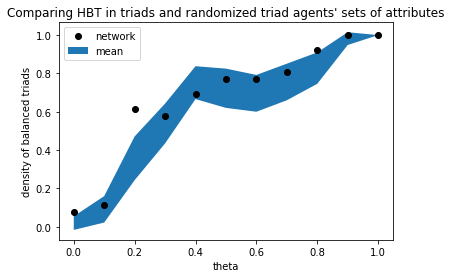

In [123]:
plt.plot(thetas, bals, 'ko')
# plt.plot(thetas, rand_bals_mean)
plt.fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized triad agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [124]:
pvals_t, triad_agents

(array([ 5., 23.,  0., 27., 70., 24., 21., 28.,  4.,  0.,  0.]),
 array([ 0,  1,  4,  5,  8,  9, 10, 11, 14, 15, 16, 20, 21, 22, 23, 24, 25,
        26, 27, 28, 29, 30, 31, 32, 33, 34, 38, 39, 40, 41, 44, 45, 48, 51,
        58, 66, 76]))

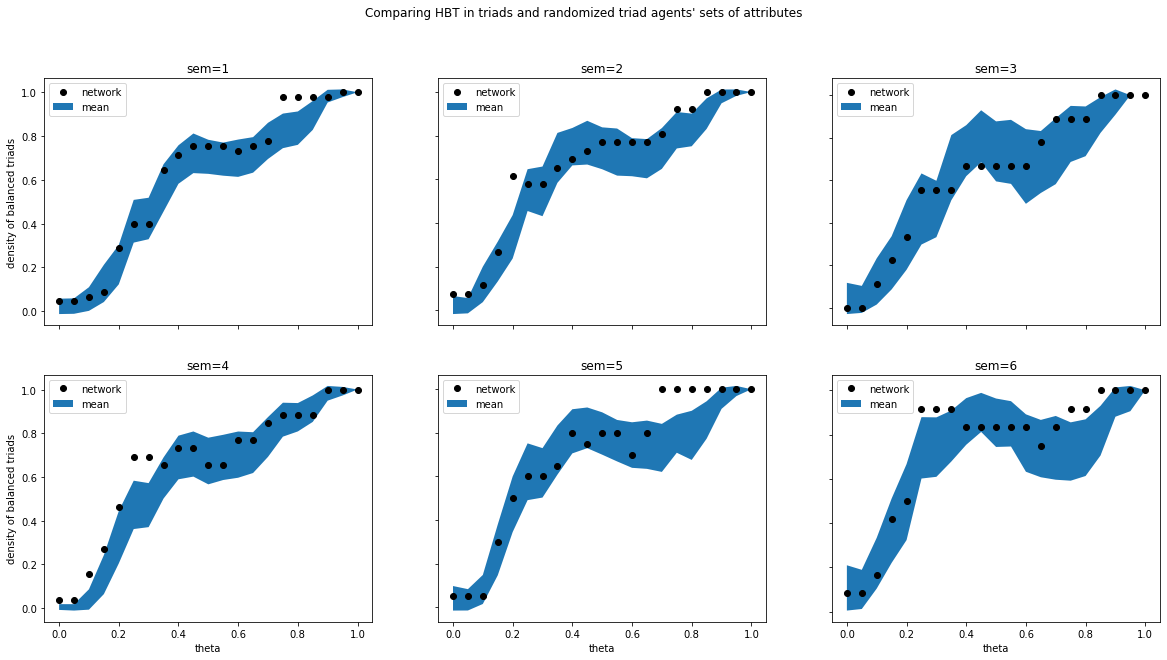

In [125]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,21)
pvals_t = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and randomized triad agents' sets of attributes")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        triads = get_triads(data[semm])
        triad_agents = np.unique(list(chain.from_iterable(triads)))

        bals = np.zeros(len(thetas))
        rand_bals_mean = np.zeros(len(thetas))
        rand_bals_std = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            rand_bal, bal, pval = compare_bal_triads(triads, ord_attributes[semm], theta, 2, 100, triad_agents)
            rand_bals_mean[i] = np.mean(rand_bal)
            rand_bals_std[i] = np.std(rand_bal)
            bals[i] = bal
            pvals_t[semm][i] = pval
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
        axs[a1, a2].legend(["network", "mean"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [361]:
pvals_t

{1: array([22., 16., 23., 16., 29., 24., 19., 34., 23., 18., 49., 13., 22.,
         7., 34.,  0.,  0.,  0.,  0.,  0.,  0.]),
 2: array([ 5.,  3.,  5.,  6., 19., 14.,  2.,  4.,  5., 45., 66., 68., 62.,
        93.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 3: array([30., 23., 28., 34., 39., 43.,  3., 31., 33., 88., 29., 11.,  5.,
        61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 4: array([ 3.,  1.,  3.,  3.,  0.,  5.,  4.,  1., 23., 40., 25.,  4., 51.,
        95., 96.,  0.,  0.,  0.,  0.,  0.,  0.]),
 5: array([21., 23., 20., 24., 28., 15., 45., 47., 32., 11., 47., 68., 53.,
        67.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 6: array([44., 50., 42., 30., 22., 12., 57., 29., 25., 49., 23., 11.,  8.,
        31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}

## Putting all semesters together

In [126]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)
M = 100

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

triad_agents = [np.unique(list(chain.from_iterable(triads))) for triads in triads_all]

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
attr_rands_M = [randomize_attribute_sets(ord_attributes, triad_agents) for i in range(0,M)] 

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(ord_attributes[semm], theta, 2)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = calc_link_polarities2(attr_rands_M[j][semm], theta, 2)
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

#saving data for this simulation
test_triad_agents_terms_together_thetas = thetas
test_triad_agents_terms_together_bal_dens = bal_dens
test_triad_agents_terms_together_bal_dens_rands = bal_dens_rands

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(9181.0,
 array([9012., 8348., 8533., 8469., 8752., 8437., 8292., 8751., 8587.,
        8485., 8824., 9061., 8055., 8797., 8599., 8533., 8285., 8971.,
        8710., 8784., 8165., 8774., 8257., 8541., 8638., 8768., 8694.,
        8729., 8268., 8716., 8686., 8718., 8698., 8785., 8251., 8968.,
        8351., 8357., 8326., 8187., 8586., 8647., 8598., 9027., 8485.,
        8598., 8474., 8645., 8747., 8475., 8529., 8722., 8784., 8611.,
        8879., 8117., 8686., 8202., 8775., 8548., 8599., 8928., 8780.,
        8615., 7970., 8737., 8557., 8655., 8267., 8674., 8786., 8346.,
        8468., 8683., 8451., 7997., 8523., 8633., 8868., 8737., 8663.,
        8576., 8764., 8659., 8799., 8609., 8488., 8842., 8400., 8922.,
        8475., 8431., 8764., 8753., 8303., 8675., 8698., 9098., 8351.,
        8133.]))

In [131]:
bal_dens_sum = 9181

In [132]:
np.sum(bal_dens_sum > bal_dens_rands_sum), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(100, 100)

In [133]:
#results: 100,100 / M = 100 / no error

In [135]:
pvals_T = np.zeros(len(thetas))
for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] >= bal_dens[i])

pvals_T

array([ 15.,  15.,  15.,  15.,  15.,  15.,  15.,  31.,  31.,  31.,  31.,
        31.,  31.,  20.,  20.,  20.,  20.,  20.,  20.,   1.,   1.,   1.,
         1.,   1.,   1.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,  38.,
        38.,  38.,  38.,  38.,  38.,  47.,  47.,  47.,  47.,  47.,  47.,
        62.,  62.,  62.,  62.,  62.,  62.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  17.,  17.,  17.,  17.,  17.,  17.,  15.,  15.,  15.,
        15.,  15.,  15.,   2.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        19.,  19.,  19.,  19.,  19.,  19.,  30.,  30.,  30.,  30.,  30.,
        30., 100.])

Text(0, 0.5, 'density of balanced triads')

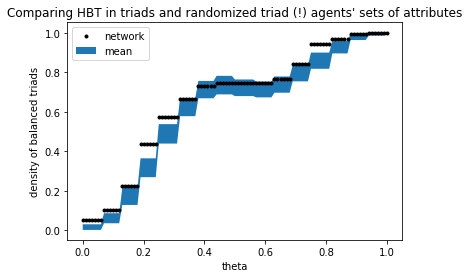

In [136]:
mean_vals = np.mean(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)
std_vals = np.std(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)

plt.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k.')

plt.fill_between(thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized triad (!) agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

# Comparing links after decorrelation

In [380]:
sem = 1
th = 0.5

polarities = calc_link_polarities2(dcor_attributes[sem], th)
pol_old = calc_link_polarities2(ord_attributes[sem], th, 2)



In [385]:
ones = np.sum(polarities == 1)/2
ones_old = np.sum(pol_old == 1)/2

ones, ones_old

(2607.0, 2933.0)

In [389]:
N = polarities.shape[0]
same = (np.sum(polarities == pol_old) - N)/2
same, same/N/(N-1)*2

(3777.0, 0.7946560067325898)

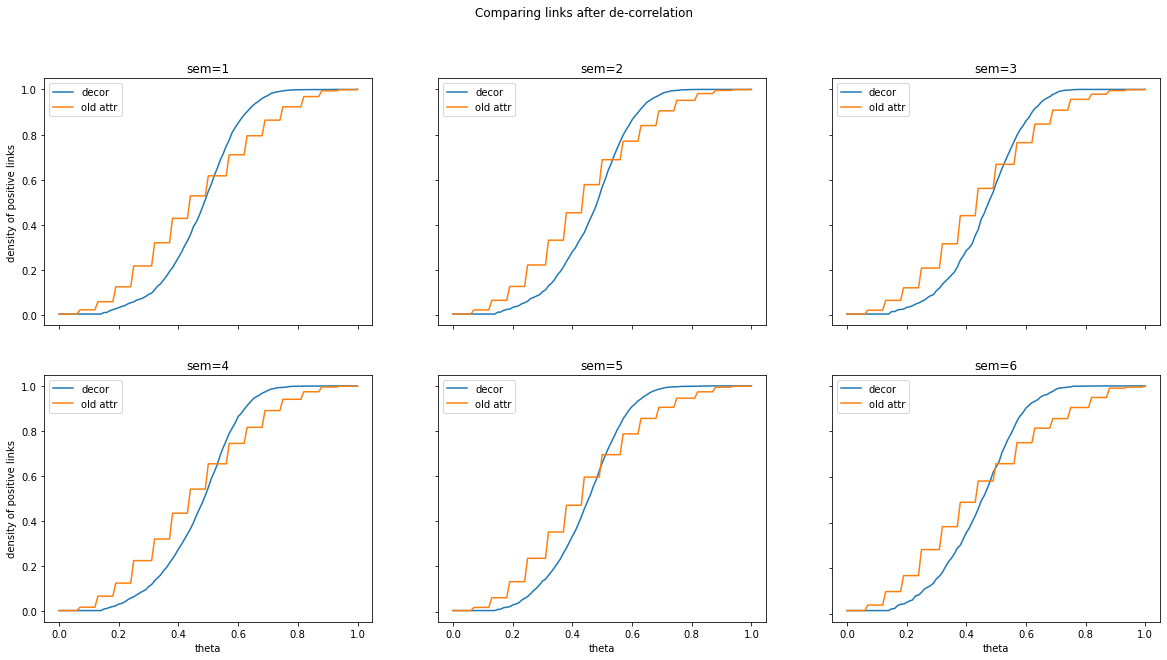

In [436]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing links after de-correlation")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        ones = np.zeros(len(thetas))
        ones_old = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            pol_old = calc_link_polarities2(ord_attributes[semm], theta, 2)
            
            N = polarities.shape[0]
            ones[i] = np.sum(polarities == 1)/2 / N/(N-1)*2
            ones_old[i] = np.sum(pol_old == 1)/2 / N/(N-1)*2
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, ones, thetas, ones_old)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["decor", "old attr"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of positive links')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

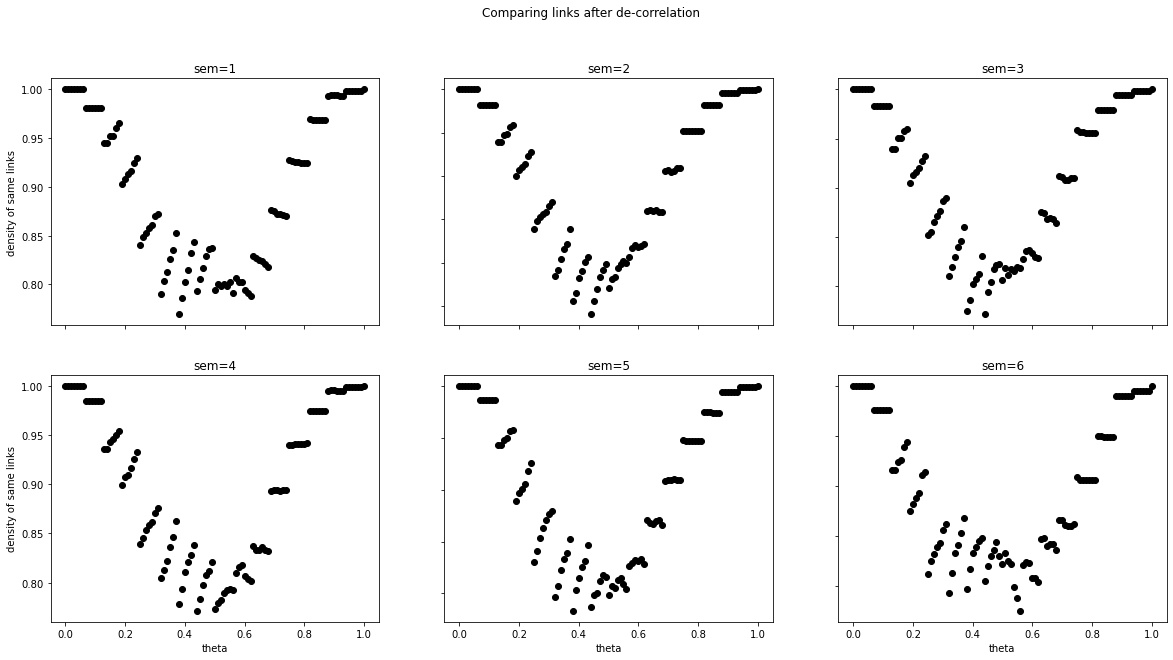

In [435]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing links after de-correlation")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        sames = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            pol_old = calc_link_polarities2(ord_attributes[semm], theta, 2)
            
            N = polarities.shape[0]
            sames[i] = (np.sum(polarities == pol_old) - N)/2 / N/(N-1)*2
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, sames, 'ko')
        # plt.plot(thetas, rand_bals_mean)

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of same links')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [425]:
data[6].degree

DegreeView({10060: 4, 85596: 10, 75261: 7, 71627: 2, 57637: 10, 66754: 6, 51552: 8, 23144: 13, 50869: 6, 25947: 6, 46160: 5, 46654: 2, 13799: 7, 86727: 4, 51722: 6, 59367: 2, 63188: 2, 68494: 6, 29914: 4, 15071: 4, 45539: 4, 46771: 5, 40997: 10, 53275: 6, 14188: 3, 17353: 2, 80058: 4, 30076: 4, 89827: 6, 37617: 2, 78911: 2, 62555: 4, 76313: 1, 50181: 1, 10841: 5, 72746: 2, 45945: 2, 26425: 2, 52067: 3, 34250: 2, 23642: 3, 66404: 6, 86352: 1, 16495: 6, 30952: 2, 19844: 1, 51597: 3, 52635: 2, 88175: 2, 75468: 2, 46021: 4, 66052: 2, 18420: 1, 68633: 2, 53884: 1, 32174: 1, 62560: 2, 25544: 5, 18344: 3, 39783: 2, 49597: 2, 44520: 2, 31583: 1})

In [405]:
A = nx.adjacency_matrix(data[6]).todense()

In [406]:
data[6].nodes

NodeView((10060, 85596, 75261, 71627, 57637, 66754, 51552, 23144, 50869, 25947, 46160, 46654, 13799, 86727, 51722, 59367, 63188, 68494, 29914, 15071, 45539, 46771, 40997, 53275, 14188, 17353, 80058, 30076, 89827, 37617, 78911, 62555, 76313, 50181, 10841, 72746, 45945, 26425, 52067, 34250, 23642, 66404, 86352, 16495, 30952, 19844, 51597, 52635, 88175, 75468, 46021, 66052, 18420, 68633, 53884, 32174, 62560, 25544, 18344, 39783, 49597, 44520, 31583))

In [430]:
degrees2 = [np.sum(A[:,i]>0) for i in range(0,len(data[6].nodes))]

In [437]:
len(degrees2), len(data[6].nodes)

(63, 63)

In [440]:
np.sort(data[6].nodes)

array([10060, 10841, 13799, 14188, 15071, 16495, 17353, 18344, 18420,
       19844, 23144, 23642, 25544, 25947, 26425, 29914, 30076, 30952,
       31583, 32174, 34250, 37617, 39783, 40997, 44520, 45539, 45945,
       46021, 46160, 46654, 46771, 49597, 50181, 50869, 51552, 51597,
       51722, 52067, 52635, 53275, 53884, 57637, 59367, 62555, 62560,
       63188, 66052, 66404, 66754, 68494, 68633, 71627, 72746, 75261,
       75468, 76313, 78911, 80058, 85596, 86352, 86727, 88175, 89827])

In [463]:
np.sum(A[0,:]>0), np.sum(A[0,:])

(1, 652)

In [452]:
list(data[6].neighbors(10060))

[51722, 85596]

In [453]:
data[6][10060]

AtlasView(UnionAtlas({85596: {'weight': 638}, 51722: {'weight': 14}}, {85596: {'weight': 844}, 51722: {'weight': 16}}))

In [456]:
list(data[6].neighbors(31583)), data[6][31583]

([88175], AtlasView(UnionAtlas({}, {88175: {'weight': 1}})))

What we can see above is that this is in fact a directed network! But adjacency matrix is undirected. 

I will check whether the order of nodes is good. 

In [466]:
np.sum(A[-3,:]>0), data[6][49597]

(1, AtlasView(UnionAtlas({39783: {'weight': 6}}, {39783: {'weight': 5}})))

In [458]:
nx.is_directed(data[6])

False

In [460]:
list(nx.enumerate_all_cliques(data[6]))

[[10060],
 [85596],
 [75261],
 [71627],
 [57637],
 [66754],
 [51552],
 [23144],
 [50869],
 [25947],
 [46160],
 [46654],
 [13799],
 [86727],
 [51722],
 [59367],
 [63188],
 [68494],
 [29914],
 [15071],
 [45539],
 [46771],
 [40997],
 [53275],
 [14188],
 [17353],
 [80058],
 [30076],
 [89827],
 [37617],
 [78911],
 [62555],
 [76313],
 [50181],
 [10841],
 [72746],
 [45945],
 [26425],
 [52067],
 [34250],
 [23642],
 [66404],
 [86352],
 [16495],
 [30952],
 [19844],
 [51597],
 [52635],
 [88175],
 [75468],
 [46021],
 [66052],
 [18420],
 [68633],
 [53884],
 [32174],
 [62560],
 [25544],
 [18344],
 [39783],
 [49597],
 [44520],
 [31583],
 [10060, 85596],
 [10060, 51722],
 [85596, 50869],
 [85596, 51722],
 [85596, 68494],
 [85596, 37617],
 [75261, 71627],
 [75261, 46654],
 [75261, 66404],
 [75261, 62560],
 [57637, 66754],
 [57637, 51552],
 [57637, 23144],
 [57637, 89827],
 [57637, 25544],
 [66754, 51552],
 [66754, 89827],
 [51552, 23144],
 [51552, 89827],
 [23144, 50869],
 [23144, 46160],
 [23144, 2642

In [468]:
get_triads(data[6])

[(0, 1, 14),
 (4, 5, 6),
 (4, 5, 28),
 (4, 6, 7),
 (4, 6, 28),
 (5, 6, 28),
 (7, 10, 40),
 (12, 13, 20),
 (18, 19, 21),
 (22, 23, 34),
 (23, 34, 53),
 (26, 27, 41)]

OK, the order of nodes is correct. 

Now let's check how weights in adjacency matrix are correlated with the weights in nodes' attributes

In [476]:
data[6][10060], A[0,:]

(AtlasView(UnionAtlas({85596: {'weight': 638}, 51722: {'weight': 14}}, {85596: {'weight': 844}, 51722: {'weight': 16}})),
 matrix([[  0, 638,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,  14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]]))

Adjacency matrix is symmetric. 

However, the weights are neither the maximum nor minimum weight of a weight i->j and j->i. 
Above is the example it is not the maximum (638, 844 -> 638). 
Also (14, 1 -> 14)


In [480]:
data[6][57637], A[4,:]

(AtlasView(UnionAtlas({66754: {'weight': 123}, 51552: {'weight': 19}, 23144: {'weight': 86}, 89827: {'weight': 6}, 25544: {'weight': 6}}, {23144: {'weight': 72}, 66754: {'weight': 106}, 51552: {'weight': 13}, 89827: {'weight': 2}, 25544: {'weight': 8}})),
 matrix([[  0,   0,   0,   0,   0, 123,  19,  86,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   6,   0,   0,   0,   0,   0]]))

It seems, that which value of weight is given is related to which node was entered first. 

In [491]:
data_nodes = list(data[6].nodes)
data[6][data_nodes[0]][85596], data[6][data_nodes[0]]

({'weight': 638},
 AtlasView(UnionAtlas({85596: {'weight': 638}, 51722: {'weight': 14}}, {85596: {'weight': 844}, 51722: {'weight': 16}})))

In [493]:
data[6][data_nodes[0]][85596]['weight']

638

In [577]:
def create_directed_adj_mat(net):
    A_undir = nx.adjacency_matrix(net).todense()
    A_dir = np.zeros(A_undir.shape, dtype=int)
    
    data_nodes = list(net.nodes)
    
    for node_ind, node in enumerate(data_nodes):
        for neigh in net[data_nodes[node_ind]]:
            try:
                neigh_ind = np.where(np.array(data_nodes) == neigh)[0][0]
            except KeyError:
                print(neigh)
                print(np.array(data_nodes) == neigh)
                print(data_nodes)
                print(net[data_nodes[node_ind]])
            try:
                A_dir[node_ind,neigh_ind] = net[data_nodes[node_ind]][neigh]['weight']
            except KeyError:
                print(node_ind, neigh_ind)
                print(net[data_nodes[node_ind]])
                print(net[data_nodes[node_ind]][neigh_ind])
                print(net[data_nodes[node_ind]][neigh_ind]['weight'])
    return A_dir, A_undir

"""
This can find also directed triads. 
"""
def get_triads_from_adj_mat(A):
    N = A.shape[0]
    
    triads = dict()
    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] == 0:
                continue
            for k in range(j+1,N):
                if A[j,k] > 0 and A[k,i] > 0:
                    triads[(i,j,k)] = (A[i,j], A[j,k], A[k, i])
    
    for i in range(0,N):
        for j in range(i+1,N):
            if A[j,i] == 0:
                continue
            for k in range(j+1,N):
                if A[k,j] > 0 and A[i,k] > 0:
                    triads[(k,j,i)] = (A[k,j], A[j,i], A[i,k])
    return triads

def find_th_polarity_change(attr, agent1, agent2, sem, dif_max = max_dif3):
    thresholds = np.linspace(0,1,101)
    
    beg_polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], 0, dif_max)
    
    for th in thresholds:
        polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], th, dif_max)
        if beg_polarity != polarity:
            break
        
    return th
    

In [558]:
A_dir, A_undir = create_directed_adj_mat(data[6])

In [559]:
triads = get_triads_from_adj_mat(A_dir)
triads

{(0, 1, 14): (638, 123, 16),
 (4, 5, 6): (123, 13, 13),
 (4, 5, 28): (123, 39, 2),
 (4, 6, 7): (19, 9, 72),
 (4, 6, 28): (19, 4, 2),
 (5, 6, 28): (13, 4, 25),
 (7, 10, 40): (1, 25, 1),
 (12, 13, 20): (16, 329, 7784),
 (18, 19, 21): (10, 2, 27),
 (22, 23, 34): (37, 18, 1),
 (23, 34, 53): (18, 4, 2),
 (26, 27, 41): (2, 115, 8),
 (14, 1, 0): (98, 844, 14),
 (6, 5, 4): (11, 106, 19),
 (28, 5, 4): (25, 106, 6),
 (7, 6, 4): (11, 13, 86),
 (28, 6, 4): (5, 13, 6),
 (28, 6, 5): (5, 11, 39),
 (40, 10, 7): (33, 1, 1),
 (20, 13, 12): (329, 10, 8604),
 (21, 19, 18): (7, 7, 21),
 (34, 23, 22): (10, 36, 1),
 (53, 34, 23): (4, 10, 2),
 (41, 27, 26): (101, 2, 6)}

In [562]:
sem = 6
th = 0.4

polarities = calc_link_polarities2(dcor_attributes[sem], th)
pol_old = calc_link_polarities2(ord_attributes[sem], th, 2)

In [569]:
polarities[12,13]

1.0

In [614]:
agent1 = 7
agent2 = 40
agent3 = 10
find_th_polarity_change(dcor_attributes, agent1, agent2, sem), find_th_polarity_change(ord_attributes, agent1, agent2, sem, 2)

(0.46, 0.25)

In [611]:
sem = 6
attr = dcor_attributes
agent1 = 40
agent2= 10
beg_polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], 0)
thresholds = np.linspace(0,1,101)
for th in thresholds:
    polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], th)
    if beg_polarity != polarity:
        print(th)
        break

0.56


In [605]:
dcor_attributes[sem][agent1], dcor_attributes[sem][agent2]

(array([-3.092,  0.259,  0.143,  0.064, -0.09 , -0.561, -0.934,  0.395]),
 array([-7.171,  0.974,  1.286,  0.951, -0.07 , -0.785,  0.362,  0.571]))

In [616]:
agent1 = 7
agent2 = 40
agent3 = 10
calc_distance(dcor_attributes[sem][agent1], dcor_attributes[sem][agent2], max_dif3), calc_distance(dcor_attributes[sem][agent1], dcor_attributes[sem][agent3], max_dif3),  calc_distance(dcor_attributes[sem][agent3], dcor_attributes[sem][agent2], max_dif3)

(0.45101236526255084, 0.5163075877959884, 0.5576475905238091)

Czemu losujemy tylko po agentach, którzy tworzą triady? Czy to ma sens?

Agenci, którzy nie tworzą triad, może mają połączenia z innymi agentami, ale ich nie widzimy. Stąd jest sens ich nie brać. 

Ale jaki sens ma, że bierzemy jedną triadę ABC i triadę DEF, które są oderwane od reszty sieci i mieszamy agentów? 

Wychodzi, że atrybuty nie mają takiego znaczenia, jeśli chodzi o otrzymanie odpowiedniej równowagi. Ewentualnie, ja źle na nie patrzę. 

# Testing statistical properties of a model with random vector attributes

Pomysły: 

1. Wygeneruję losowe atrybuty (randomizacja). Następnie wykonam jeszcze M randomizacji i policzę odgległości w zależności od tety. Następnie sprawdzę, czy te różnice są opisywane np. rozkładem normalnym, co pozwoliłoby wykorzystać t-test w porównaniu danych rzeczywsitych. 
2. Założę rozkłąd jednorodny teta. Będę losował teta i w ten sposób otrzymam odpowiednie wartości z danych rzeczywistych lub z modelu losowego (randomizacji). Otrzymam dwa ciągi liczb i będę mógł je porównać np. Kruskalem. 

In [152]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)
M = 100

################################
art = randomize_attribute_sets(dcor_attributes)
attr_rands_M = [randomize_attribute_sets(dcor_attributes) for i in range(0,M)] 

############################3
triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

bal_dens = np.zeros(len(thetas))
bal_dens_rands_sum = np.zeros(M)

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(art[semm], theta)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = calc_link_polarities2(attr_rands_M[j][semm], theta)
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


NameError: name 'dcor_attributes' is not defined

(array([0.   , 0.   , 0.001, 0.002, 0.001, 0.002, 0.002, 0.001, 0.001,
        0.   ]),
 array([-582. , -486.8, -391.6, -296.4, -201.2, -106. ,  -10.8,   84.4,
         179.6,  274.8,  370. ]),
 <BarContainer object of 10 artists>)

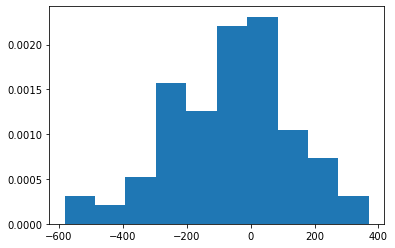

In [64]:
plt.hist(bal_dens_sum - bal_dens_rands_sum, density=True)

In [65]:
import statsmodels.api as sm
import pylab as py

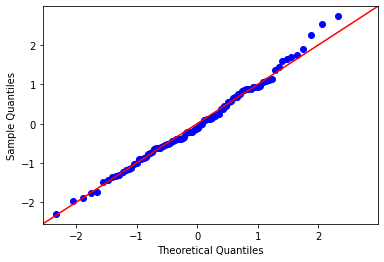

In [71]:
bal_dens_rands_sum_mean = np.mean(bal_dens_rands_sum)
bal_dens_rands_sum_std = np.std(bal_dens_rands_sum)

data_points = (bal_dens_rands_sum - bal_dens_rands_sum_mean) / bal_dens_rands_sum_std

sm.qqplot(data_points, line ='45')
py.show()

In [73]:
stats.shapiro(data_points)

ShapiroResult(statistic=0.9908419847488403, pvalue=0.7324216961860657)

In [74]:
stats.shapiro(bal_dens_rands_sum)

ShapiroResult(statistic=0.9908415079116821, pvalue=0.7323837280273438)

Conclusion: one can treat the sum of densities as a random variable. So we can test the obtain statistic from real data using the Student's t-test. 

In [85]:
1-stats.norm.cdf(8415,bal_dens_rands_sum_mean, bal_dens_rands_sum_std)

0.007496395239859122

Powyżej jest p-value rezultatu sumy gęstości przy założeniu normalności uzyskiwanych gęstości z danych losowych. Oczywiście przy stosownym teście hipoteza, że dane pochodzą z takiego rozkładu jak dane losowe, zostałaby odrzucona. 

In [91]:
bal_dens_rands

array([[0.007, 0.007, 0.007, ..., 1.   , 1.   , 1.   ],
       [0.022, 0.022, 0.022, ..., 1.   , 1.   , 1.   ],
       [0.   , 0.   , 0.   , ..., 1.   , 1.   , 1.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 1.   , 1.   , 1.   ],
       [0.022, 0.022, 0.022, ..., 1.   , 1.   , 1.   ],
       [0.014, 0.014, 0.014, ..., 1.   , 1.   , 1.   ]])

/home/pgorski/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9764745831489563, pvalue=1.731517413263134e-34)

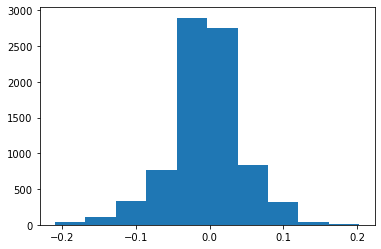

In [111]:
data_points = [(bal_dens - bal_dens_rands[i])[:-20] for i in range(M)]

# data_points[data_points == 0]

plt.hist([item for sublist in data_points for item in sublist])

stats.shapiro(data_points)

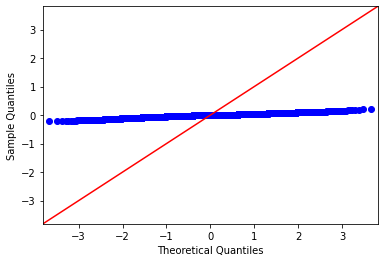

In [113]:
dd = np.array([item for sublist in data_points for item in sublist])
sm.qqplot(dd, line ='45')
py.show()

Różnice nie są normalne. Przy porównywaniu przebiegów konieczne są testy nieparametryczne. 

Przeprowadzę test Wilcoxona w ten sposób, że wylosuję M thet i dla każdej z nich policzę bal_dens w danych i dla każdej z nich przeprowadzę randomizację i policzę gęstość zrównoważonych. 

In [54]:
first_sem = 1
last_sem = 6
M = 100

thetas = np.random.random(M)


################################
# art = randomize_attribute_sets(dcor_attributes)
attr_rands_M = [randomize_attribute_sets(ord_attributes) for i in range(0,M)] 

############################3
triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

bal_dens = np.zeros(len(thetas))
bal_dens_rands = np.zeros(M)

for i, theta in enumerate(thetas):
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        
        polarities = calc_link_polarities2(ord_attributes[semm], theta, 2)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
        attr_rand = randomize_attribute_sets(ord_attributes)
        polarities_rand = calc_link_polarities2(attr_rand[semm], theta, 2)
        bal_dens_rands[i] = bal_dens_rands[i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]


bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

np.sum(bal_dens > bal_dens_rands), np.sum(bal_dens >= bal_dens_rands)

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(73, 87)

In [194]:
bal_dens

array([0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.051, 0.101, 0.101,
       0.101, 0.101, 0.101, 0.101, 0.225, 0.225, 0.225, 0.225, 0.225,
       0.225, 0.435, 0.435, 0.435, 0.435, 0.435, 0.435, 0.572, 0.572,
       0.572, 0.572, 0.572, 0.572, 0.572, 0.667, 0.667, 0.667, 0.667,
       0.667, 0.667, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.746,
       0.746, 0.746, 0.746, 0.746, 0.746, 0.746, 0.746, 0.746, 0.746,
       0.746, 0.746, 0.746, 0.746, 0.746, 0.746, 0.746, 0.746, 0.746,
       0.768, 0.768, 0.768, 0.768, 0.768, 0.768, 0.841, 0.841, 0.841,
       0.841, 0.841, 0.841, 0.942, 0.942, 0.942, 0.942, 0.942, 0.942,
       0.942, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.993, 0.993,
       0.993, 0.993, 0.993, 0.993, 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   ])

In [56]:
stats.wilcoxon(bal_dens, bal_dens_rands, alternative = 'greater')

WilcoxonResult(statistic=3400.5, pvalue=2.169537823543658e-11)

Wynikiem testu Wilcoxona jest odrzucenie H0 iprzyjęcie hipotezy, że mediana gęstości rzeczywistych jest większa niż mediana gęstości zrandomizowanych. 

In [57]:
from statsmodels.stats import descriptivestats
descriptivestats.sign_test(bal_dens - bal_dens_rands)

(30.0, 2.71882136707807e-11)

Dwustronny test znaków daje taką samą odpowiedź. (Python nie ma jednostronnej wersji tego testu.)

In [72]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_ecdf(a):
    x, y = ecdf(a)
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    plt.plot(x, y, drawstyle='steps-post')
    plt.grid(True)
#     plt.savefig('ecdf.png')

In [78]:
x_b, y_b = ecdf(bal_dens)
x_b = np.insert(x_b, 0, x_b[0])
y_b = np.insert(y_b, 0, 0.)

x_r, y_r = ecdf(bal_dens_rands)
x_r = np.insert(x_r, 0, x_r[0])
y_r = np.insert(y_r, 0, 0.)

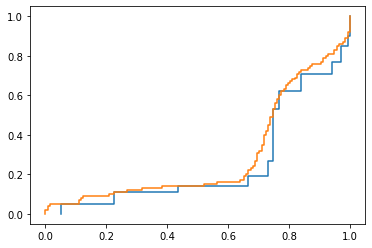

In [80]:
plt.plot(x_b, y_b, x_r, y_r, drawstyle='steps-post')


# Sum of ranks analysis

Let's calculate a rank for a given threshold for each series for randomized datasets and let's what is the distribution of these values. Is it normal?

What is the prob. that the sum of ranks for RL dataset is larger than for randomized datasets? 

In [5]:
def calc_rank(vals, val):
    """
    Includes val in vals array sorts it and calculates rank for the val.
    """
    all_vals = np.append(vals, val)
    
    all_ranks = stats.rankdata(all_vals)
    return all_ranks[-1]

def calc_ranks(vals, val = []):
    """
    Calculated ranks and allows to include one more value. 
    """
    all_vals = np.append(vals, val)
    
    all_ranks = stats.rankdata(all_vals)
    if np.isscalar(val):
        return all_ranks[0:-1], all_ranks[-1]
    else:
        return all_ranks, []

def get_important_theta_values(thetas, bal_dens_rands, bal_dens = [], distances = [i/16 for i in range(0,16)]):
    """
    There are only 16 (17) distinct thetas. So we do not need all the values. 
    """
    pds = np.array([bal_dens[np.where(thetas >= distances[i])[0][0]] for i in range(0, len(distances))])
    rds = np.array([[bal_dens_rands[j][np.where(thetas >= distances[i])[0][0]] for i in range(0, len(distances))] for j in range(0, len(bal_dens_rands))])
    return pds, rds

def calc_ranks_thetas(bal_dens_rands, bal_dens = []):
    M, num_thetas = bal_dens_rands.shape
#     print(M); 
#     print(num_thetas)
    rl_rank = np.zeros(num_thetas)
    rand_ranks = np.zeros([num_thetas, M])
    
    for theta_ind in range(0, num_thetas):
        vals = [bal_dens_rands[i][theta_ind] for i in range(0, M)]
        if len(bal_dens) > 0:
            val = bal_dens[theta_ind]
        else:
            val = []
        
        rand_ranks[theta_ind], rl_rank[theta_ind] = calc_ranks(vals, val)
    return rand_ranks, rl_rank


In [7]:
pvals_T = np.zeros(len(df_sum.index))

for ind, row in df_sum.iterrows():   
    G = row.G
    # if G < 8:
    #     continue
    comb = row.Attributes

    inds_G = df_rands.G == G
    df_rands_G = df_rands[inds_G]
    
    inds_G = df.G == G
    df_G = df[inds_G]
    
    # print(df_G)
    
    inds_c = df_rands_G.Attributes == comb
    bal_dens_rands = df_rands_G[inds_c].NumBal.values
    bal_dens_rands = np.array([np.array(sin_arr) for sin_arr in bal_dens_rands])
    bal_dens_rands = bal_dens_rands.transpose()
    
    inds_c = df_G.Attributes == comb
    bal_dens = df_G[inds_c].NumBal.values
    
    rand_ranks, rl_rank = calc_ranks_thetas(bal_dens_rands, bal_dens)
    
    sums = np.sum(rand_ranks,0)
    
    pvals_T[ind] = 1-np.sum(sums < np.sum(rl_rank))/len(sums)
    # print(1-np.sum(sums < np.sum(rl_rank))/len(sums))
    # print(ind)

pvals_T[-1] = 0.005 #from previous more thorough tests
df_sum["pvals"] = pvals_T
df_sum

,Attributes,G,Thetas,SumBal,pvals
0,"(0,)",1,"(0.0, 0.5)",192.0,0.990
1,"(1,)",1,"(0.0, 0.5)",240.0,0.060
2,"(2,)",1,"(0.0, 0.5)",258.0,0.420
3,"(3,)",1,"(0.0, 0.5)",246.0,0.620
4,"(4,)",1,"(0.0, 0.5)",242.0,0.260
...,...,...,...,...,...
250,"(0, 1, 2, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1272.0,0.000
251,"(0, 1, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1268.0,0.010
252,"(0, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1262.0,0.050
253,"(1, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1330.0,0.000


In [8]:
# #save, commented out not accidentally do it
# with open('CG_true_densities_1st_pval.pkl', 'wb') as file:
      
#     # A new file will be created
#     pickle.dump((df, df_sum), file)

In [26]:
vals = [rds[i][0] for i in range(0, len(rds))]
val = pds[0]

calc_ranks(vals, val)

(array([ 370.5,  370.5,  370.5,  961. ,  122. ,  370.5,  961. ,  851. ,
         370.5,  744. ,  744. ,  921. ,  921. ,  588. ,  122. ,  122. ,
         961. ,  744. ,  851. ,  370.5,  122. ,  122. ,  370.5,  122. ,
         122. ,  370.5,  370.5,  921. ,  961. ,  851. ,  122. ,  851. ,
         122. ,  588. ,  370.5,  370.5,  370.5,  851. ,  370.5,  370.5,
         851. ,  370.5,  588. ,  122. ,  588. ,  122. ,  998. ,  370.5,
         122. ,  921. ,  744. ,  744. ,  122. ,  122. ,  588. ,  370.5,
         921. ,  122. ,  370.5,  851. ,  744. ,  370.5,  588. ,  122. ,
         744. ,  122. ,  370.5,  122. ,  122. ,  744. ,  588. ,  122. ,
         851. ,  122. ,  921. ,  122. ,  370.5,  122. ,  122. ,  370.5,
         851. ,  122. ,  588. ,  851. ,  588. ,  744. ,  370.5,  588. ,
         122. ,  588. ,  370.5,  851. ,  122. ,  122. ,  744. ,  961. ,
         588. ,  588. ,  370.5,  370.5,  370.5,  370.5,  122. ,  370.5,
         588. ,  588. ,  122. ,  588. ,  921. ,  744. ,  122. , 

In [27]:
rand_ranks, rl_rank = calc_ranks_thetas(rds, pds)

In [28]:
sums = np.sum(rand_ranks,0)

/home/pgorski/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


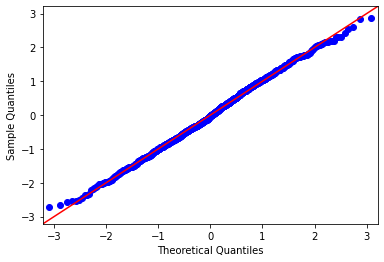

In [29]:

sm.qqplot((sums - np.mean(sums)) / np.std(sums), line ='45')
py.show()

In [30]:

stats.shapiro(sums)

ShapiroResult(statistic=0.9973403811454773, pvalue=0.10011351853609085)

In [31]:
np.sum(sums < np.sum(rl_rank)), sums, np.sum(rl_rank)

(995,
 array([ 6957.5,  5008.5,  9832. , 10680. ,  2844.5,  8384. ,  7049. ,
         7561.5,  6536.5, 10918.5,  6588. ,  8345.5,  8361.5,  7685.5,
         8636.5,  6907.5,  8173. ,  5802.5, 10902. ,  7474. ,  7414. ,
         8925.5,  9437.5,  6206.5,  4296.5,  7914.5, 10357. , 12107. ,
        11109.5,  8262.5,  5473. ,  9019.5,  6369.5,  6179.5, 10035. ,
         8340.5,  5195.5,  9639.5,  9037. ,  6935. , 10554. ,  7663.5,
         4801.5,  6757.5, 11697. ,  8761.5, 10446.5,  9528. ,  6165.5,
        10257. ,  9769.5,  9854.5,  7078.5,  6979. ,  9986. ,  7590. ,
        10278.5,  7013.5,  6792.5,  8599. , 11152. , 10342.5,  9894. ,
         9740. ,  8347. ,  6941. , 11552. ,  5780.5,  5989.5, 12835. ,
         7192. ,  6235.5,  7723.5,  4659.5, 12510.5,  7244.5,  7588.5,
         5061.5,  5467.5,  8264.5,  9448.5,  9159. ,  8027.5,  7151.5,
         8960.5, 10076. , 12614.5, 10550. ,  2723. , 11090. ,  4814. ,
         5770.5,  9042. ,  6410. ,  8186.5,  8761. ,  6860.5,  3723.5,


In [11]:
np.max(sums)

13994.5

In [14]:
# pvalue:
1-np.sum(sums < np.sum(rl_rank))/len(sums)

0.0050000000000000044

In [20]:
rl_sum = np.sum(rl_rank)
zscore = (rl_sum - np.mean(sums)) / np.std(sums)

1-stats.norm.cdf(zscore)

0.00788292052352002

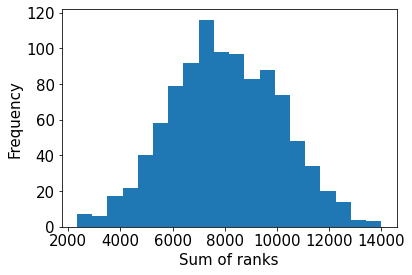

In [38]:


plt.hist(sums, bins = 20)

# plt.title('(e) Model C8')
# fig.set_size_inches(6, 5)
plt.rcParams.update({'font.size': 15})
# plt.plot((0,1),(0,0), color='black')
plt.xlabel("Sum of ranks")
plt.ylabel("Frequency")

plt.savefig("c8_stat_hist.pdf",dpi=600,bbox_inches='tight',format='pdf')


# Distributions

In [132]:
b = np.linspace(0,1,9)
b = np.append(b, 1+1/16)
b

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
       1.062])

(array([0.183, 0.816, 1.562, 1.663, 1.458, 1.229, 0.835, 0.242, 0.024]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        1.062]),
 <BarContainer object of 9 artists>)

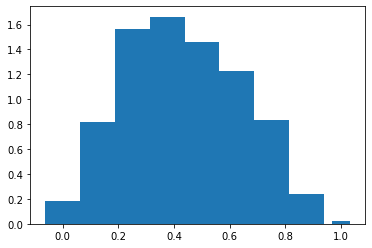

In [134]:
dists = calc_distances(ord_attributes[1], 2)

# function triu_to_array

# b = np.linspace(0,1/16,1)

plt.hist(dists[np.triu_indices(dists.shape[0], 1)], density=True, bins = b, align = 'left')

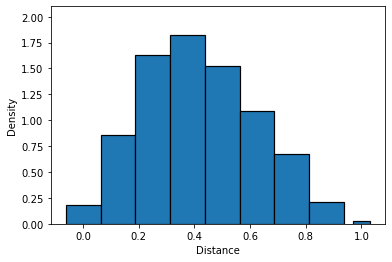

In [143]:
dists = [calc_distances(ord_attributes[i], 2) for i in range(1,7)]
dists2 = [dists[i][np.triu_indices(dists[i].shape[0], 1)] for i in range(0,6)]
dists3 = np.concatenate(dists2)

plt.hist(dists3, density=True, bins = b, align = 'left',edgecolor='black', linewidth=1.2)
plt.ylim([0,2.1])
plt.xlabel('Distance')
plt.ylabel('Density')

# plt.savefig("dd_all_ord.pdf",dpi=600,bbox_inches='tight',format='pdf')

dists_ord_all = dists3

### Distribution of distance among connected agents

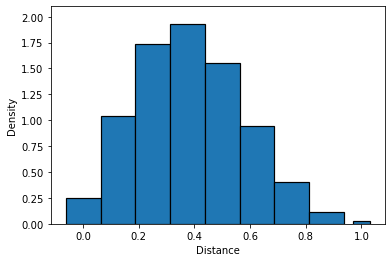

In [139]:
#all sems

dists = np.array([])
semm = 0
for semm in range(1,7):
    dists_t = calc_distances(ord_attributes[semm], 2)
    N = dists_t.shape[0]
    
    A = nx.adjacency_matrix(data[semm]).todense() 
    
    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                dists = np.append(dists, dists_t[i,j])
        

plt.hist(dists, density=True, bins = b, align = 'left', edgecolor='black', linewidth=1.2)
plt.ylim([0,2.1])

plt.xlabel('Distance')
plt.ylabel('Density')

dists_ord_con = dists

# plt.savefig("dd_ord.pdf",dpi=600,bbox_inches='tight',format='pdf')

(array([0.211, 0.895, 1.526, 2.105, 1.526, 0.842, 0.632, 0.263, 0.   ]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        1.062]),
 <BarContainer object of 9 artists>)

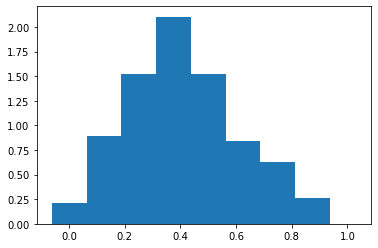

In [136]:
#chosen sem
semms = [1]

dists = np.array([])
semm = 0
for semm in semms:
    dists_t = calc_distances(ord_attributes[semm], 2)
    N = dists_t.shape[0]
    
    A = nx.adjacency_matrix(data[semm]).todense() 
    
    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                dists = np.append(dists, dists_t[i,j])
        

plt.hist(dists, density=True, bins = b, align = 'left')

### Distrubution after randomizing agents

### Distribution after PCA

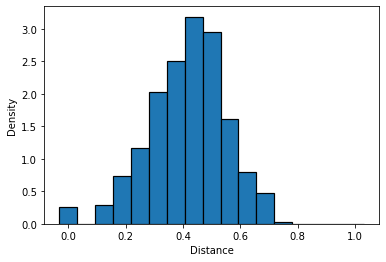

In [130]:
#all sems

dists = np.array([])
semm = 0
for semm in range(1,7):
    dists_t = calc_distances(dcor_attributes[semm], max_dif3)
    N = dists_t.shape[0]
    
    A = nx.adjacency_matrix(data[semm]).todense() 
    
    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                dists = np.append(dists, dists_t[i,j])
        

plt.hist(dists, density=True, bins = b, align = 'left', edgecolor='black', linewidth=1.2)
# plt.ylim([0,2.1])


plt.xlabel('Distance')
plt.ylabel('Density')

plt.savefig("dd_pca.pdf",dpi=600,bbox_inches='tight',format='pdf')

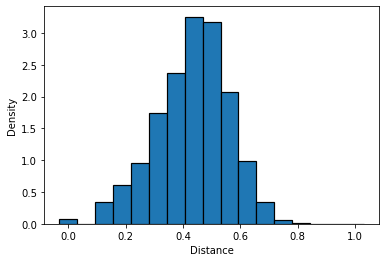

In [131]:
dists = [calc_distances(dcor_attributes[i], max_dif3) for i in range(1,7)]
dists2 = [dists[i][np.triu_indices(dists[i].shape[0], 1)] for i in range(0,6)]
dists3 = np.concatenate(dists2)

plt.hist(dists3, density=True, bins = b, align = 'left',edgecolor='black', linewidth=1.2)
# plt.ylim([0,2.1])

plt.xlabel('Distance')
plt.ylabel('Density')

plt.savefig("dd_pca_all.pdf",dpi=600,bbox_inches='tight',format='pdf')

### KS test

Comparing ord distributions for connected and all pairs of students

In [144]:
stats.ks_2samp(dists_ord_con, dists_ord_all)

KstestResult(statistic=0.06215807933204942, pvalue=0.02004821347156924)